# Основная часть анализа методом ВР

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import json
from pandas import read_csv, DataFrame
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import ml_metrics as metrics
from IPython.display import display
import statsmodels.api as sm
import random
from wordcloud import WordCloud

In [3]:
plt.style.use('ggplot') 

In [4]:
df = pd.DataFrame()

+ Прочитываем всё, что есть в репризитории

In [5]:
for (path, dirs, files) in os.walk('/Users/alinashaymardanova/Desktop/Курсовая/Norm'):
        for f in files:
            print(f)
            if f != '.DS_Store':
                add_df = pd.read_csv('/Users/alinashaymardanova/Desktop/Курсовая/Norm/' + str(f), sep='\t')
                df = pd.concat([df, add_df], ignore_index=True)

.DS_Store
2011.csv
2012.csv
2013.csv
2014.csv
2015.csv
2016.csv
2017.csv
2018.csv


+ Объединяем группы Инфинитив и Глагол

In [6]:
df = df.replace(to_replace=['INFN'], value=['VERB'])

+ Несмотря на то, что при токенизации была проведена чистка текстов, некоторые из знаков препинания и других знаков всё равно попали в итоговые файлы. Заменяем всё, что не слово, на 0. После этого удаляем все 0 из датафрейма.

In [7]:
df['Лексема'] = df['Лексема'].str.replace(r'(\W)', '0')
df = df.drop(df[df['Лексема'] == '0'].index)

### Смотрим на численность каждой лексической группы по каждому году.

In [8]:
ex_year = pd.DataFrame(df.groupby('Часть речи')['Год'].value_counts().unstack())

+ В некоторых годах (2011-2012) встречаются не все лексические группы. Для того, чтобы NaN'ы не препятсвовали построению графиков, заменяем их на 0.

In [9]:
ex_year = ex_year.fillna(0).transpose()

In [10]:
ex_year

Часть речи      ADJF   ADJS     ADVB  COMP      CONJ   GRND    INTJ      NOUN  \
Год                                                                             
2011          1048.0    3.0    382.0   0.0     495.0    3.0    36.0    3241.0   
2012         13583.0   42.0   6611.0   0.0   10453.0   46.0   327.0   34525.0   
2013         64606.0  168.0  27101.0   1.0   44296.0  191.0  1813.0  154059.0   
2014        104899.0  242.0  41829.0   0.0   76261.0  306.0  2532.0  228618.0   
2015        151121.0  366.0  56703.0   2.0  102435.0  460.0  3328.0  350289.0   
2016        191821.0  501.0  77294.0   3.0  137785.0  537.0  4439.0  444619.0   
2017        154255.0  412.0  68201.0   1.0  113087.0  376.0  3531.0  376060.0   
2018         63600.0  122.0  27807.0   1.0   46163.0  139.0  1504.0  156667.0   

Часть речи     NPRO    NUMR    None     PRCL    PRED      PREP   PRTF  PRTS  \
Год                                                                           
2011          297.0    30.0    72.0    242.0    44.0    1005.0    0.0   1.0   
2012         8441.0   330.0  1036.0   4883.0   457.0   12554.0   12.0   5.0   
2013        26089.0  2081.0  3357.0  20898.0  2576.0   52853.0   59.0   8.0   
2014        43948.0  3103.0  3367.0  36344.0  4573.0   78668.0   65.0   7.0   
2015        60032.0  4376.0  4097.0  46596.0  5946.0  115322.0   78.0  11.0   
2016        80960.0  5860.0  5801.0  63633.0  7914.0  156576.0  157.0  15.0   
2017        67692.0  5251.0  5587.0  53297.0  6168.0  133884.0  145.0  11.0   
2018        26831.0  2404.0  2477.0  21774.0  2706.0   56835.0   70.0   2.0   

Часть речи      VERB  
Год                   
2011          1116.0  
2012         17730.0  
2013         73366.0  
2014        120296.0  
2015        169070.0  
2016        230625.0  
2017        195331.0  
2018         81486.0

+ Коэффициент корреляции Пирсона

In [11]:
ex_year.corr(method='pearson')

Часть речи      ADJF      ADJS      ADVB      COMP      CONJ      GRND  \
Часть речи                                                               
ADJF        1.000000  0.993609  0.994730  0.802451  0.998664  0.988152   
ADJS        0.993609  1.000000  0.993008  0.801195  0.993920  0.979701   
ADVB        0.994730  0.993008  1.000000  0.778572  0.997684  0.968558   
COMP        0.802451  0.801195  0.778572  1.000000  0.787538  0.812061   
CONJ        0.998664  0.993920  0.997684  0.787538  1.000000  0.980922   
GRND        0.988152  0.979701  0.968558  0.812061  0.980922  1.000000   
INTJ        0.996511  0.991232  0.993285  0.798612  0.995923  0.984503   
NOUN        0.998323  0.994338  0.997243  0.807406  0.997684  0.979976   
NPRO        0.997581  0.995459  0.998192  0.786028  0.999426  0.978507   
NUMR        0.991747  0.986093  0.998114  0.786371  0.994387  0.961040   
None        0.959206  0.964631  0.975533  0.745878  0.963885  0.925912   
PRCL        0.997247  0.992569  0.998224  0.774860  0.999649  0.977067   
PRED        0.998357  0.989209  0.993283  0.791027  0.998479  0.985666   
PREP        0.995447  0.993428  0.999081  0.802426  0.997322  0.970276   
PRTF        0.928253  0.937181  0.957802  0.758062  0.941283  0.867255   
PRTS        0.906066  0.936036  0.897485  0.782624  0.901390  0.923622   
VERB        0.996574  0.993542  0.999199  0.793119  0.998802  0.972763   

Часть речи      INTJ      NOUN      NPRO      NUMR      None      PRCL  \
Часть речи                                                               
ADJF        0.996511  0.998323  0.997581  0.991747  0.959206  0.997247   
ADJS        0.991232  0.994338  0.995459  0.986093  0.964631  0.992569   
ADVB        0.993285  0.997243  0.998192  0.998114  0.975533  0.998224   
COMP        0.798612  0.807406  0.786028  0.786371  0.745878  0.774860   
CONJ        0.995923  0.997684  0.999426  0.994387  0.963885  0.999649   
GRND        0.984503  0.979976  0.978507  0.961040  0.925912  0.977067   
INTJ        1.000000  0.994228  0.994108  0.989982  0.972832  0.995606   
NOUN        0.994228  1.000000  0.997682  0.995884  0.966060  0.996391   
NPRO        0.994108  0.997682  1.000000  0.994049  0.965843  0.999043   
NUMR        0.989982  0.995884  0.994049  1.000000  0.973977  0.994946   
None        0.972832  0.966060  0.965843  0.973977  1.000000  0.967063   
PRCL        0.995606  0.996391  0.999043  0.994946  0.967063  1.000000   
PRED        0.996652  0.994775  0.996283  0.990350  0.956633  0.997889   
PREP        0.992495  0.998572  0.997863  0.998168  0.971281  0.996906   
PRTF        0.935696  0.941482  0.944288  0.962135  0.964365  0.945312   
PRTS        0.913224  0.903602  0.908266  0.875383  0.902197  0.897267   
VERB        0.993048  0.998325  0.999040  0.997449  0.967498  0.998557   

Часть речи      PRED      PREP      PRTF      PRTS      VERB  
Часть речи                                                    
ADJF        0.998357  0.995447  0.928253  0.906066  0.996574  
ADJS        0.989209  0.993428  0.937181  0.936036  0.993542  
ADVB        0.993283  0.999081  0.957802  0.897485  0.999199  
COMP        0.791027  0.802426  0.758062  0.782624  0.793119  
CONJ        0.998479  0.997322  0.941283  0.901390  0.998802  
GRND        0.985666  0.970276  0.867255  0.923622  0.972763  
INTJ        0.996652  0.992495  0.935696  0.913224  0.993048  
NOUN        0.994775  0.998572  0.941482  0.903602  0.998325  
NPRO        0.996283  0.997863  0.944288  0.908266  0.999040  
NUMR        0.990350  0.998168  0.962135  0.875383  0.997449  
None        0.956633  0.971281  0.964365  0.902197  0.967498  
PRCL        0.997889  0.996906  0.945312  0.897267  0.998557  
PRED        1.000000  0.992997  0.929389  0.894394  0.995229  
PREP        0.992997  1.000000  0.957375  0.898147  0.999536  
PRTF        0.929389  0.957375  1.000000  0.828705  0.953215  
PRTS        0.894394  0.898147  0.828705  1.000000  0.896116  
VERB        0.995229  0.999536  0.953215  0.896116  

+ Т.к. для каждого года объём текстов разный, необходимо масштабировать все показатели, для корректного результата анализа.

In [12]:
def mean_(df):
    for year in df.columns:
        sum_ = 0
        for el in df[year]:
            sum_ += int(el)
        for el in df[year]:
            df[year][df[year] == [el]] = (df[year][df[year] == [el]]/sum_) * 100
    return df

In [13]:
ex_year = ex_year.transpose()
ex_year = mean_(ex_year)

In [14]:
ex_year

Год              2011       2012       2013       2014       2015       2016  \
Часть речи                                                                     
ADJF        13.075483  12.233080  13.643717  14.079307  14.120396  13.618428   
ADJS         0.000467   0.037826   0.035479   0.032481   0.034198   0.035569   
ADVB         4.766064   5.953978   5.723282   5.614194   5.298197   5.487526   
COMP         0.000000   0.000000   0.000211   0.000000   0.000187   0.000213   
CONJ         6.175920   9.414149   9.354581  10.235579   9.571289   9.782115   
GRND         0.000467   0.041428   0.040336   0.041071   0.042981   0.038125   
INTJ         0.449158   0.294502   0.382876   0.339839   0.310961   0.315149   
NOUN        40.436681  31.093799  32.534708  30.684591  32.730193  31.565948   
NPRO         3.705552   7.602107   5.509564   5.898601   5.609251   5.747796   
NUMR         0.374298   0.297204   0.439473   0.416478   0.408883   0.416034   
None         0.898316   0.933039   0.708943   0.451911   0.382814   0.411845   
PRCL         3.019339   4.397712   4.413311   4.878009   4.353822   4.517657   
PRED         0.548971   0.411582   0.544009   0.613778   0.555580   0.561858   
PREP        12.538989  11.306345  11.161678  10.558641  10.775421  11.116191   
PRTF         0.000000   0.010807   0.012460   0.008724   0.007288   0.011146   
PRTS         0.012477   0.004503   0.001689   0.000940   0.001028   0.001065   
VERB        13.923893  15.967938  15.493684  16.145857  15.797509  16.373337   

Год              2017       2018  
Часть речи                        
ADJF        13.036122  12.964035  
ADJS         0.034818   0.024868  
ADVB         5.763681   5.668096  
COMP         0.000085   0.000204  
CONJ         9.557006   9.409729  
GRND         0.031776   0.028333  
INTJ         0.298406   0.306571  
NOUN        31.780909  31.934536  
NPRO         5.720665   5.469151  
NUMR         0.443763   0.490024  
None         0.472159   0.504904  
PRCL         4.504141   4.438347  
PRED         0.521259   0.551583  
PREP        11.314565  11.585077  
PRTF         0.012254   0.014269  
PRTS         0.000930   0.000408  
VERB        16.507464  16.609864

+ Для каждой лексической группы построим график "Прогресса" или график "Тренда" напротяжении 2011-2018 годов включительно.

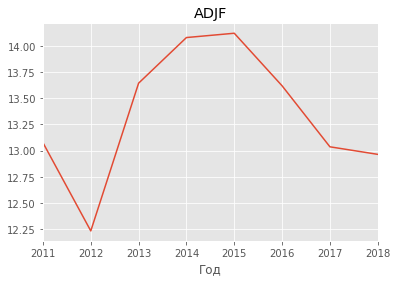

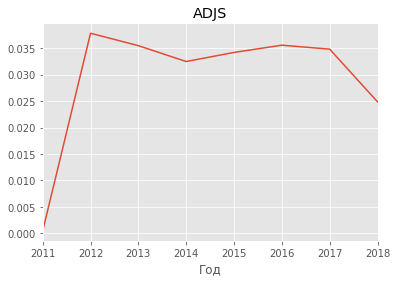

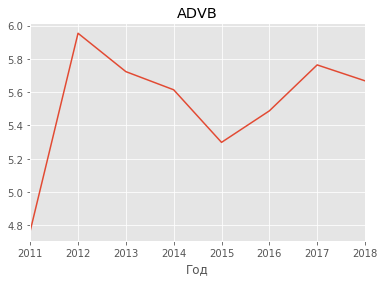

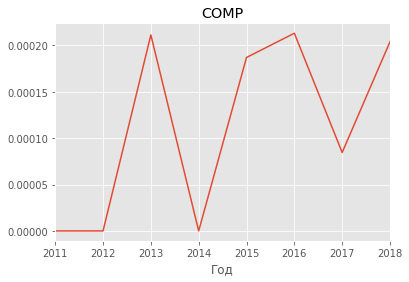

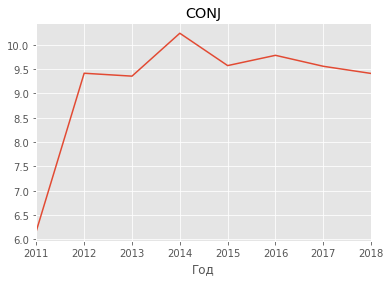

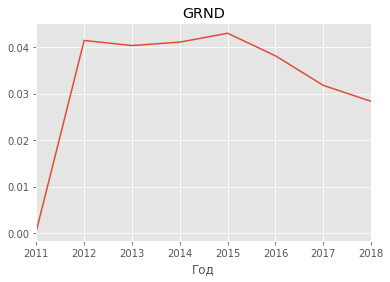

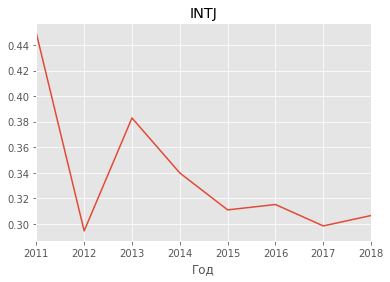

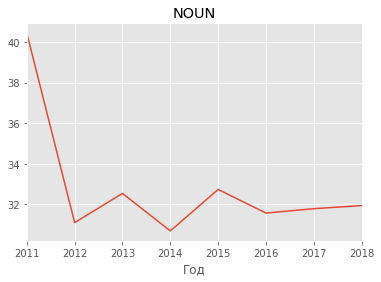

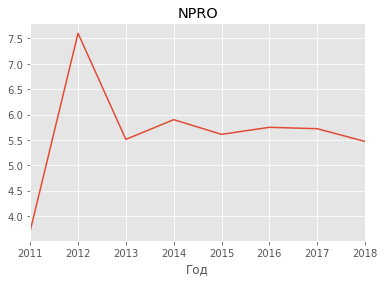

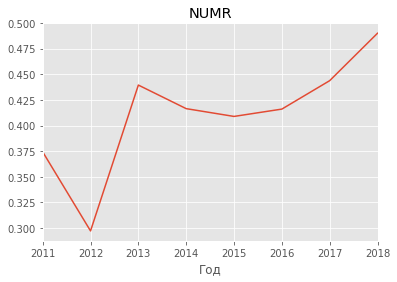

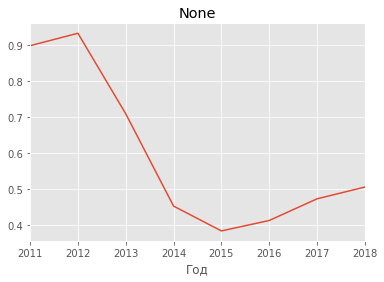

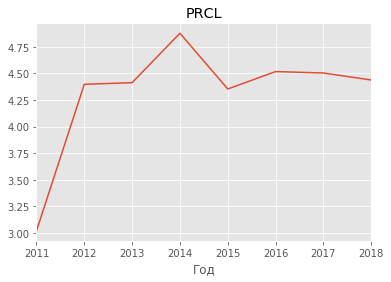

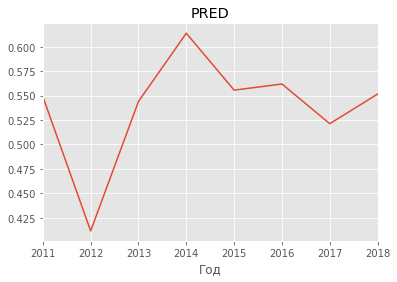

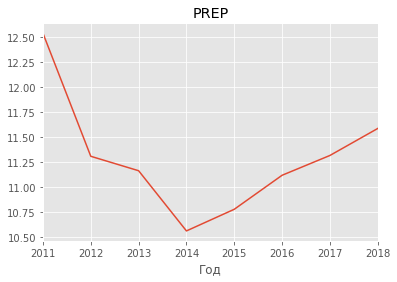

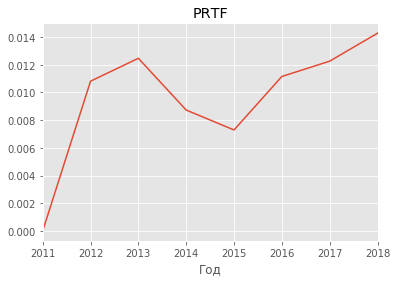

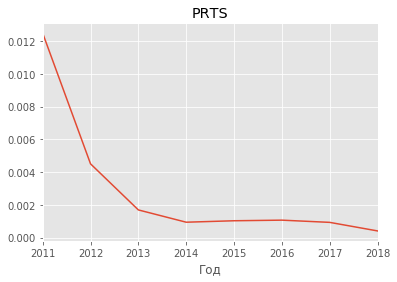

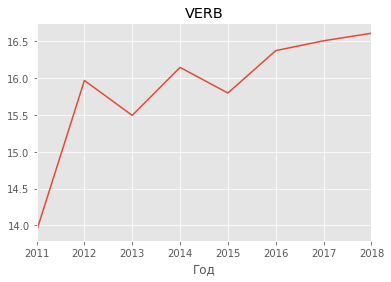

In [15]:
ex_year = ex_year.transpose()
for el in ex_year:
    ex_year[el].plot()
    plt.title(el)
    plt.savefig(str(el) + ' годовая тенденция.png', format='png')
    plt.show()

+ Строим общий график, иллюстрирующий общее распределение.

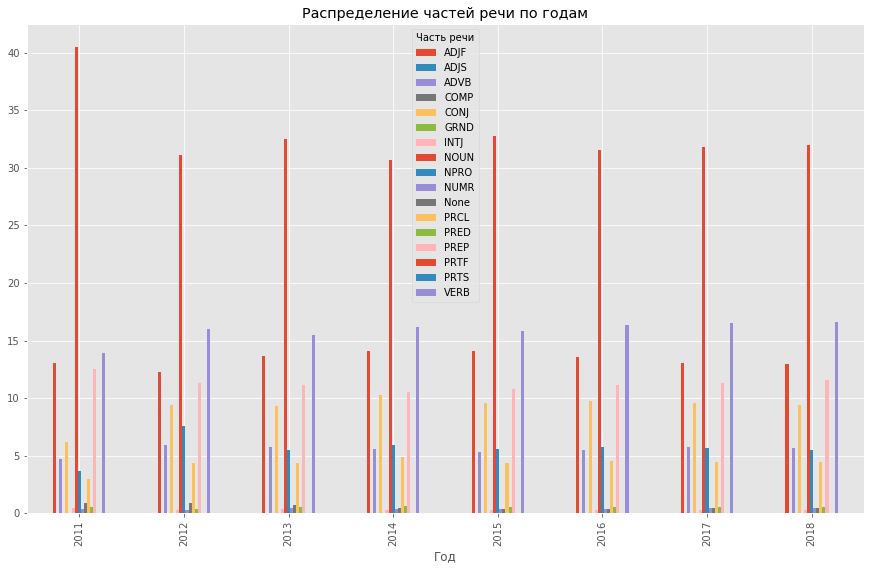

In [16]:
plt.style.use('ggplot') 
ex_year.plot.bar(figsize=(15, 9))
plt.title("Распределение частей речи по годам")
plt.savefig('Распределение частей речи по годам.png', format='png')
plt.show()

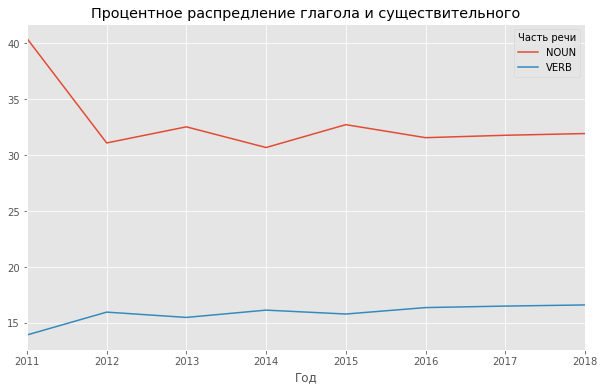

In [17]:
ex_year[['NOUN','VERB']].plot(figsize=(10,6), mark_right=False)
plt.title("Процентное распредление глагола и существительного")
plt.savefig('Процентное распредление глагола и существительного.png', format='png')
plt.show()

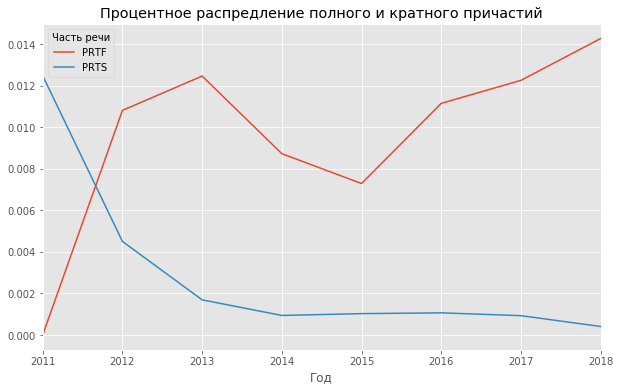

In [18]:
ex_year[['PRTF','PRTS']].plot(figsize=(10,6), mark_right=False)
plt.title("Процентное распредление полного и кратного причастий")
plt.savefig('Процентное распредление полного и кратного причастий.png', format='png')
plt.show()

### Теперь, то же самое делаем по месяцам

In [20]:
ex_month = df.groupby(['Часть речи'])['Месяц'].value_counts().unstack().fillna(0)
ex_month = mean_(ex_month)
ex_month = ex_month.transpose()

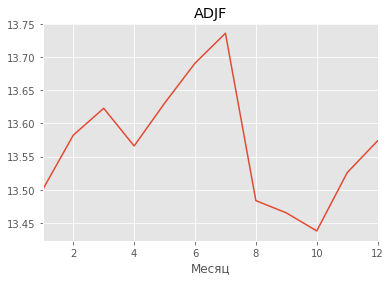

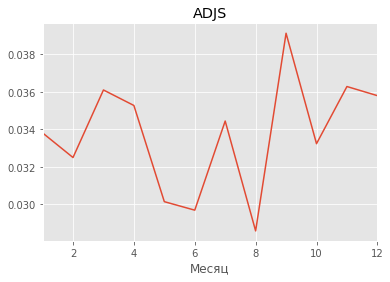

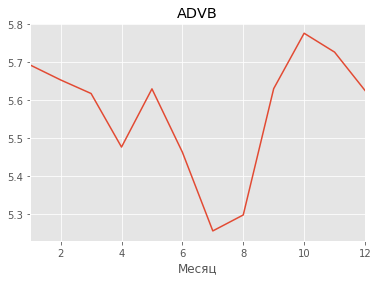

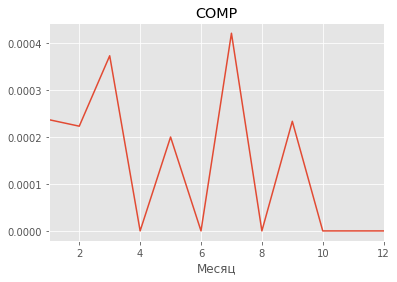

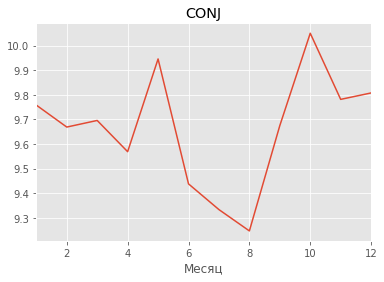

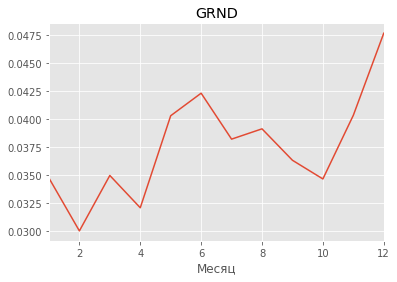

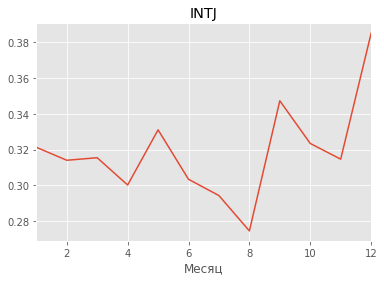

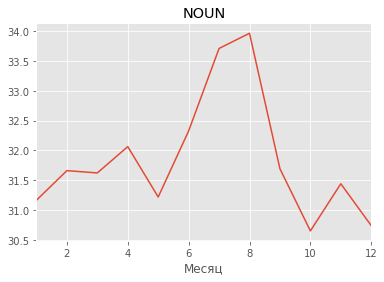

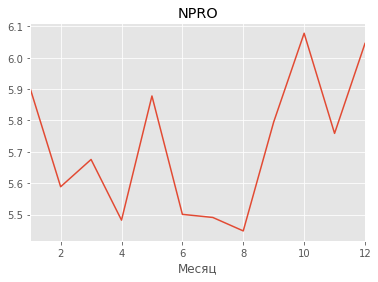

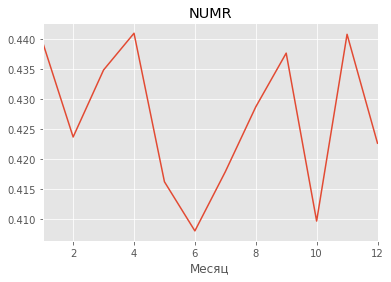

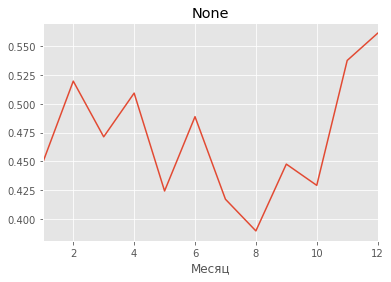

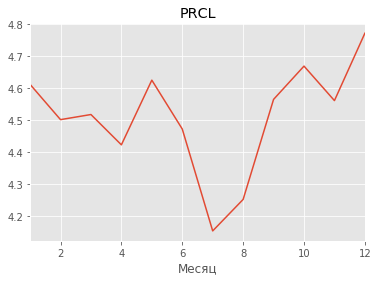

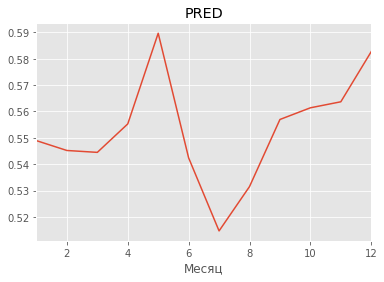

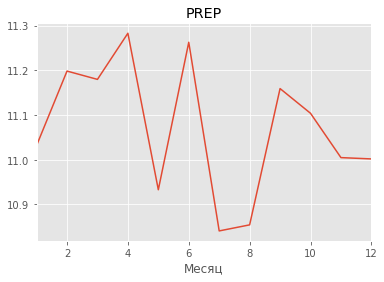

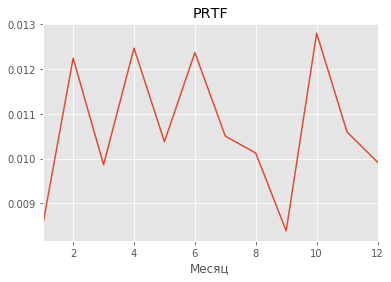

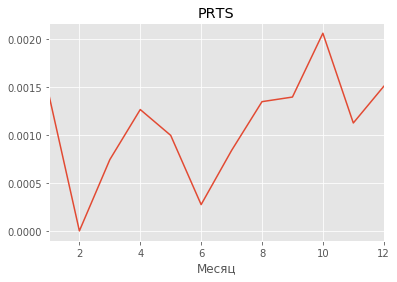

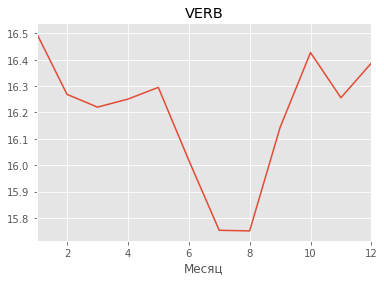

In [22]:
for el in ex_month:
    ex_month[el].plot()
    plt.title(el)
    plt.savefig(str(el) + ' годовая тенденция.png', format='png')
    plt.show()

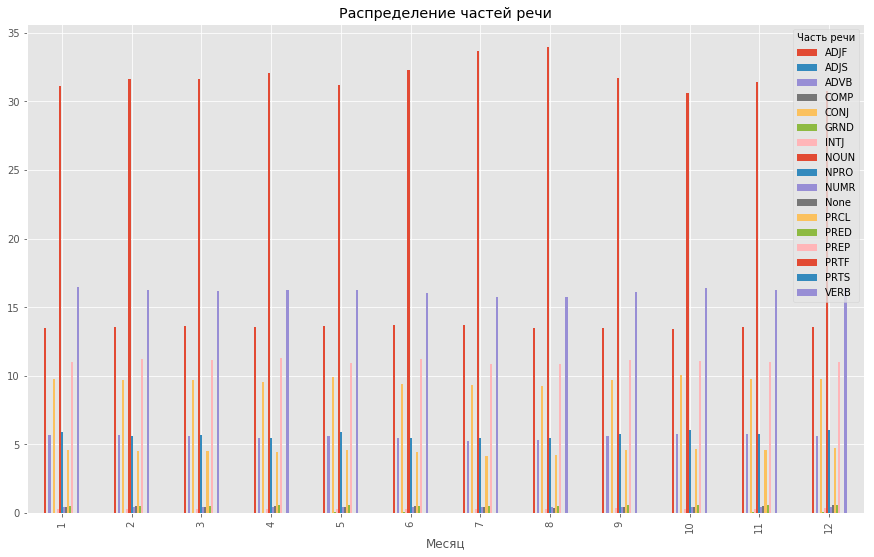

In [23]:
ex_month.plot.bar(figsize=(15, 9))
plt.title("Распределение частей речи")
plt.savefig('Распределение частей речи.png', format='png')
plt.show()

In [24]:
ex_month.head()

Часть речи       ADJF      ADJS      ADVB      COMP      CONJ      GRND  \
Месяц                                                                     
1           13.500505  0.033806  5.692212  0.000236  9.757943  0.034752   
2           13.582156  0.032490  5.653038  0.000223  9.668669  0.030042   
3           13.622737  0.036101  5.617430  0.000372  9.695542  0.034984   
4           13.565963  0.035272  5.476738  0.000000  9.568556  0.032104   
5           13.630368  0.030131  5.629618  0.000200  9.945665  0.040307   

Часть речи      INTJ       NOUN      NPRO      NUMR      None      PRCL  \
Месяц                                                                     
1           0.321277  31.165322  5.901669  0.439481  0.449174  4.612068   
2           0.313996  31.661285  5.588726  0.423705  0.519618  4.501423   
3           0.315419  31.622815  5.675675  0.434887  0.471360  4.517465   
4           0.300133  32.063735  5.482230  0.441012  0.509233  4.422366   
5           0.331037  31.219408  5.878045  0.416240  0.424421  4.625334   

Часть речи      PRED       PREP      PRTF      PRTS       VERB  
Месяц                                                           
1           0.548937  11.031941  0.008511  0.001418  16.500748  
2           0.545209  11.198369  0.012239  0.000000  16.268812  
3           0.544493  11.179777  0.009863  0.000744  16.220335  
4           0.555277  11.282968  0.012462  0.001267  16.250684  
5           0.589640  10.932989  0.010376  0.000998  16.295223

### Делаем то же самое по часам.

In [25]:
ex_hour = df.groupby(['Часть речи'])['Час'].value_counts().unstack().fillna(0)
ex_hour = mean_(ex_hour)
ex_hour = ex_hour.transpose()

In [26]:
ex_hour.head()

Часть речи       ADJF      ADJS      ADVB          COMP       CONJ      GRND  \
Час                                                                            
0           12.847091  0.033184  6.223320  0.000000e+00   9.709841  0.038808   
1           12.494800  0.034204  6.481285  8.545987e-07  10.068132  0.035129   
2           13.261040  0.051808  6.191939  0.000000e+00  10.025725  0.042876   
3           13.643173  0.000126  5.557636  0.000000e+00   9.362595  0.037450   
4           12.806288  0.000128  5.275081  0.000000e+00   9.741100  0.013870   

Часть речи      INTJ       NOUN      NPRO      NUMR      None      PRCL  \
Час                                                                       
0           0.439260  29.687456  6.524784  0.424637  0.618676  4.866732   
1           0.284729  28.969336  6.745676  0.454827  0.484409  5.040999   
2           0.339431  30.591682  5.947192  0.462698  0.446620  4.853866   
3           0.367014  32.439518  5.209348  0.389484  0.460640  4.658827   
4           0.337494  31.932501  5.681923  0.453074  0.365233  4.618585   

Часть речи      PRED       PREP      PRTF          PRTS       VERB  
Час                                                                 
0           0.570307  11.118173  0.008436  2.249731e-03  16.887047  
1           0.602738  10.902906  0.007396  8.545987e-07  17.391586  
2           0.634200  10.652780  0.012505  1.786480e-03  16.483850  
3           0.565501  11.186428  0.000126  0.000000e+00  16.054977  
4           0.499307  11.830791  0.000128  4.623209e-03  16.384651

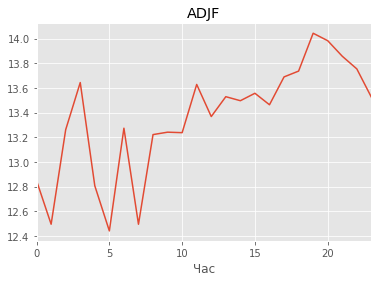

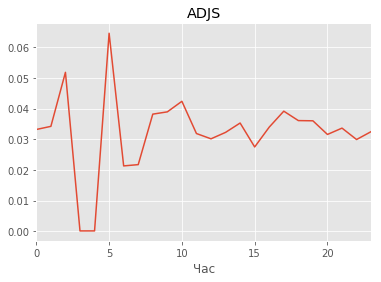

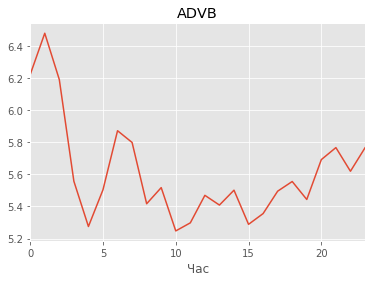

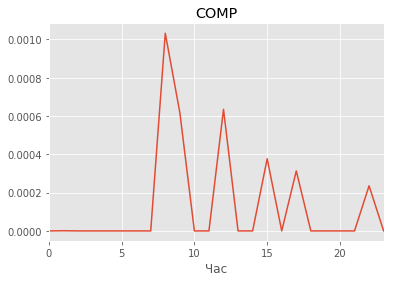

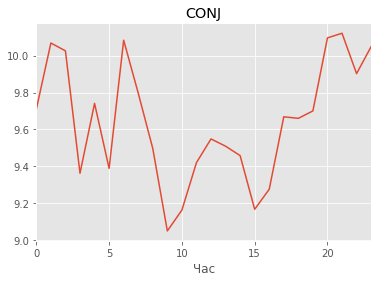

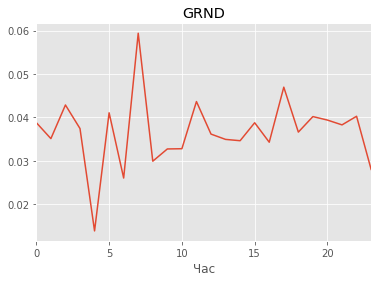

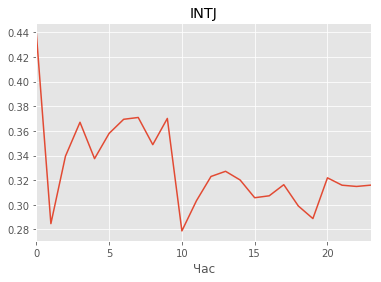

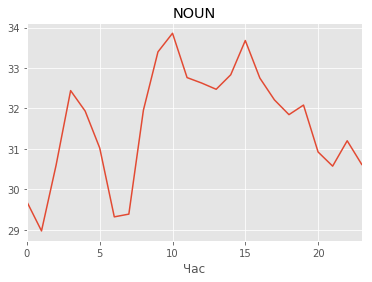

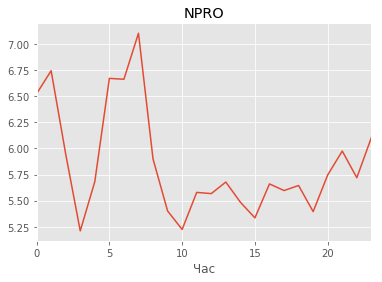

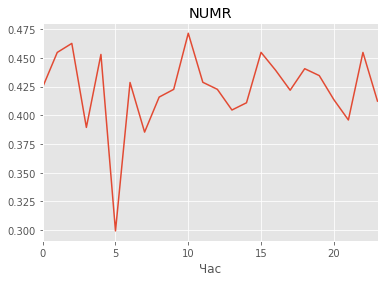

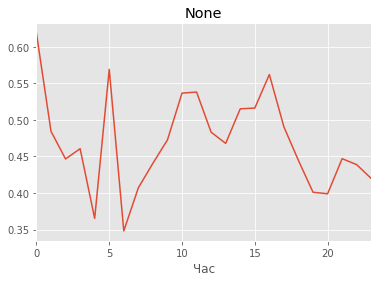

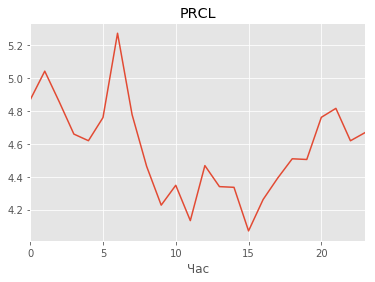

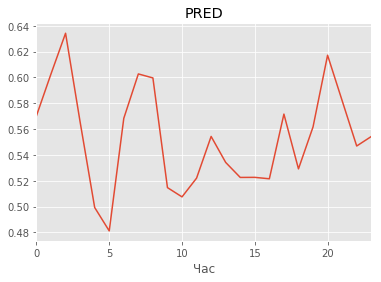

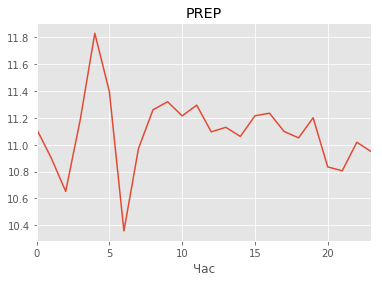

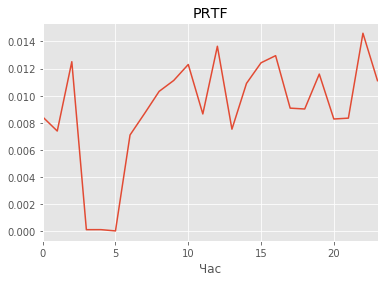

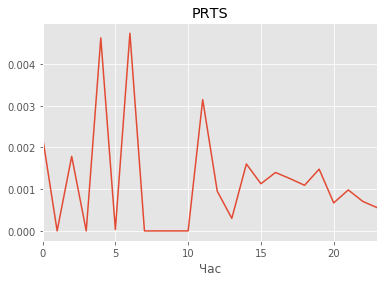

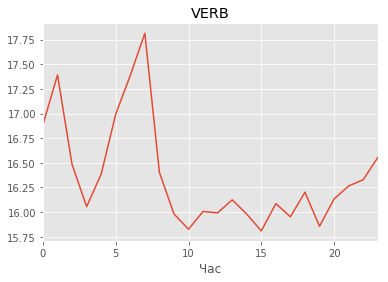

In [27]:
for el in ex_hour:
    ex_hour[el].plot()
    plt.title(el)
    plt.savefig(str(el) + ' часовая тенденция.png', format='png')
    plt.show()

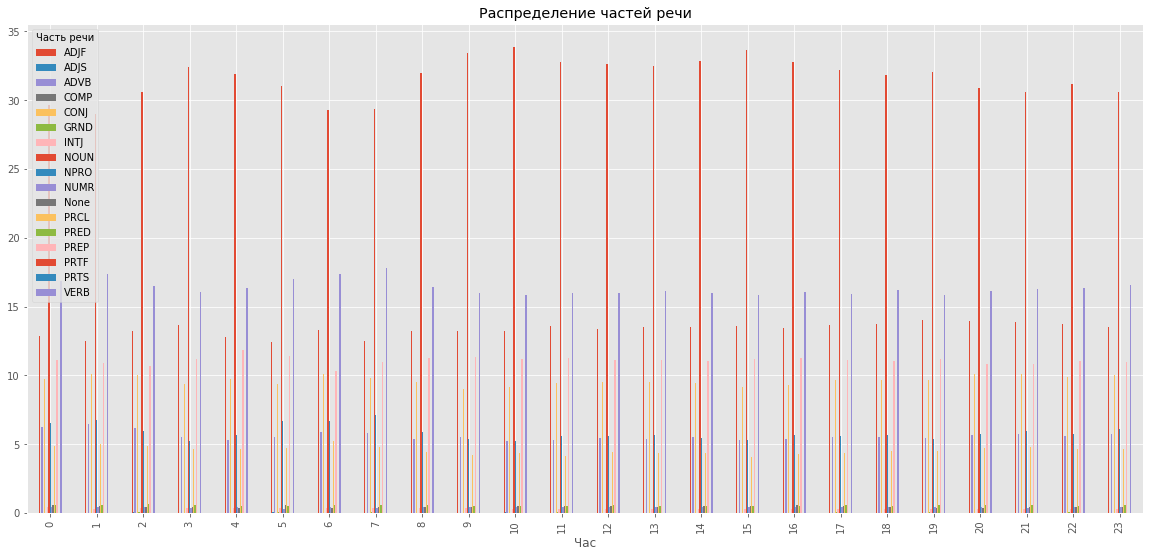

In [28]:
plt.style.use('ggplot') 
ex_hour.plot.bar(figsize=(20, 9))
plt.title("Распределение частей речи")
plt.savefig('Распределение частей речи.png', format='png')
plt.show()

### Рассмотрим междометия

In [34]:
INTJ = df[df['Часть речи'] == 'INTJ']
INTJ = INTJ.groupby(['Лексема'])['Год'].value_counts().unstack().fillna(0)
s = []
for el in INTJ.values:
    s.append(sum(el))
    
test = pd.DataFrame()
test['Лексема'] = INTJ.reset_index()['Лексема']
test['Частота'] = s
test = test.drop(test[test['Лексема'] == 'есть'].index)

+ Чамые частотные междометия

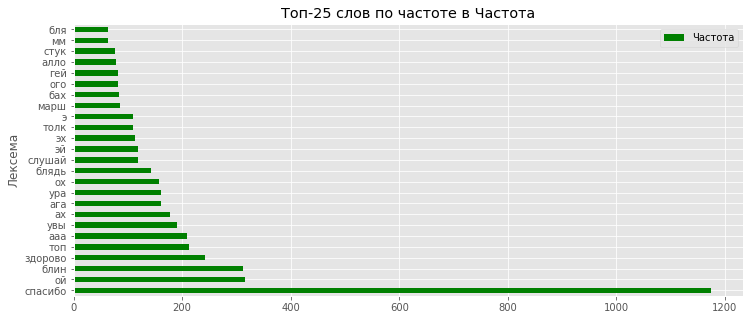

In [35]:
vizualization(test.sort_values(by=test.columns[1], ascending=False)[:25][['Лексема', 'Частота']])

### Рассмотрим ненормативную лексику

Строка с массивом слов удалена.

In [37]:
filthy_lang = pd.DataFrame()
filthy_lang = df[df['Лексема'] == 'сука']
for word in filthy_words:
    filthy_lang = filthy_lang.append(df[df['Лексема'] == word], ignore_index=True)

filthy_lang_year = filthy_lang.groupby(['Год'])['Лексема'].value_counts().unstack().fillna(0)
s = []
for el in filthy_lang_year.values:
    s.append(sum(el))
    
test = pd.DataFrame()
test['Год'] = filthy_lang_year.reset_index()['Год']
test['Частота'] = s

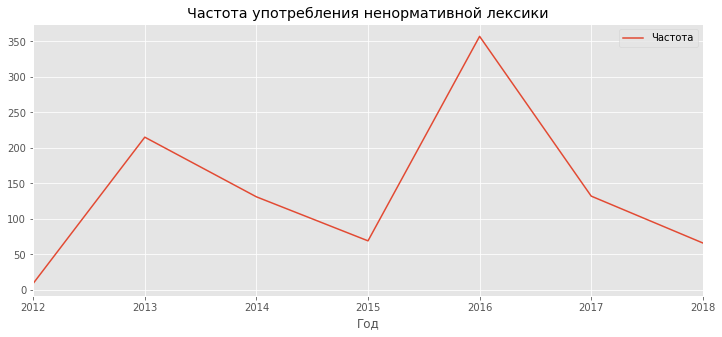

In [38]:
test.plot(y='Частота', x='Год', figsize=(12, 5))
plt.title('Частота употребления ненормативной лексики')
plt.savefig('Частота употребления ненормативной лексики.png', format='png')
plt.show()

In [39]:
filthy_lang_year = filthy_lang.groupby(['Месяц'])['Лексема'].value_counts().unstack().fillna(0)
s = []
for el in filthy_lang_year.values:
    s.append(sum(el))
    
test = pd.DataFrame()
test['Месяц'] = filthy_lang_year.reset_index()['Месяц']
test['Частота'] = s

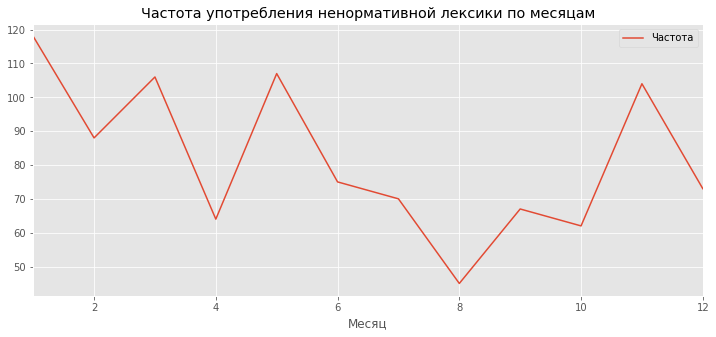

In [40]:
test.plot(y='Частота', x='Месяц', figsize=(12, 5))
plt.title('Частота употребления ненормативной лексики по месяцам')
plt.savefig('Частота употребления ненормативной лексики по месяцам.png', format='png')
plt.show()

In [41]:
filthy_lang_year = filthy_lang.groupby(['Час'])['Лексема'].value_counts().unstack().fillna(0)
s = []
for el in filthy_lang_year.values:
    s.append(sum(el))
    
test = pd.DataFrame()
test['Час'] = filthy_lang_year.reset_index()['Час']
test['Частота'] = s

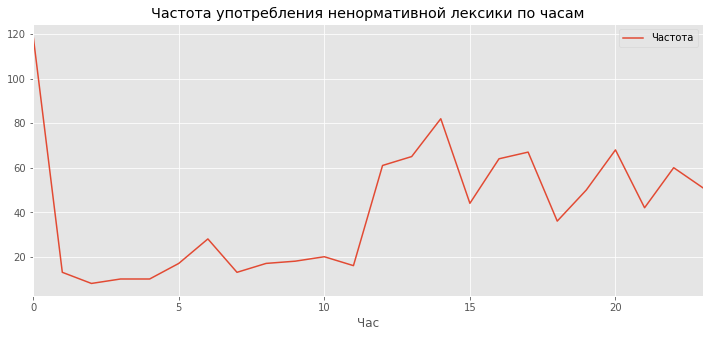

In [42]:
test.plot(y='Частота', x='Час', figsize=(12, 5))
plt.title('Частота употребления ненормативной лексики по часам')
plt.savefig('Частота употребления ненормативной лексики по часам.png', format='png')
plt.show()

+ Распределение для None

In [43]:
df[df['Часть речи'] == 'None'].head()

Unnamed: 0   Год  День Лексема  Месяц  Час Часть речи
59           59  2011     5     изз      7   22       None
201         201  2011    21       й      6   21       None
228         228  2011    21      еп      6   21       None
468         468  2011     4     изз      6    4       None
959         959  2011    12     пхк      4   21       None

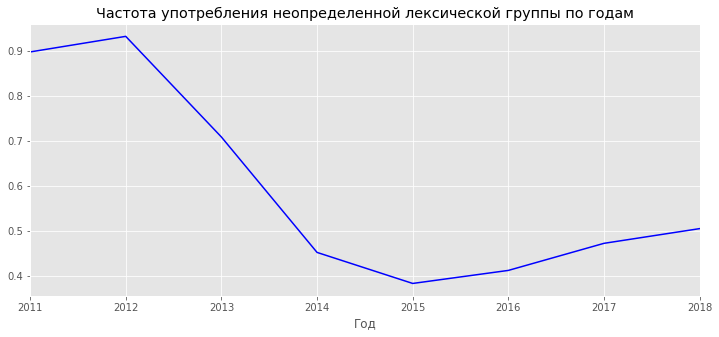

In [44]:
ex_year['None'].transpose().plot(figsize=(12, 5), color = 'blue')
plt.title('Частота употребления неопределенной лексической группы по годам')
plt.savefig('Частота употребления неопределенной лексической группы по годам.png', format='png')
plt.show()

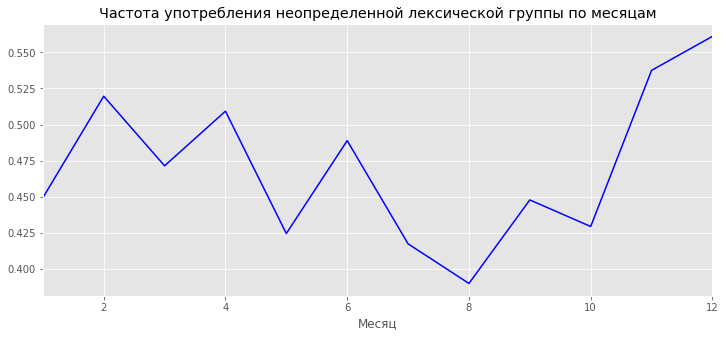

In [45]:
ex_month['None'].transpose().plot(figsize=(12, 5), color = 'blue')
plt.title('Частота употребления неопределенной лексической группы по месяцам')
plt.savefig('Частота употребления неопределенной лексической группы по месяцам.png', format='png')
plt.show()

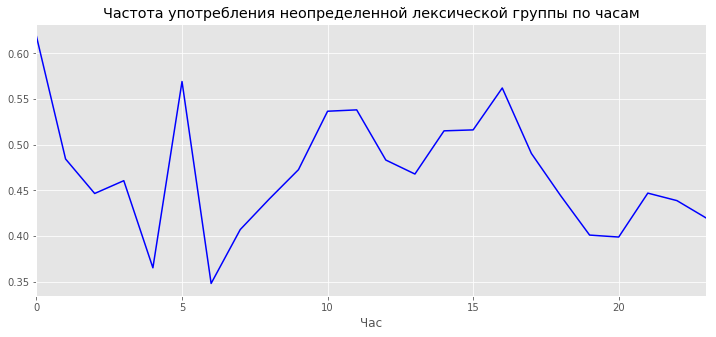

In [46]:
ex_hour['None'].transpose().plot(figsize=(12, 5), color = 'blue')
plt.title('Частота употребления неопределенной лексической группы по часам')
plt.savefig('Частота употребления неопределенной лексической группы по часам.png', format='png')
plt.show()

### Для определенного часа/месяца/года/времени года определяем топ-25 самых частотных слов

+ Для построения обычного графика

In [31]:
def vizualization(data):
    data.plot.barh(data['Лексема'], figsize=(12, 5), color = 'green')
    plt.title('Топ-25 слов по частоте в ' + str(data.columns[1]))
    plt.savefig(str(data.columns[1]) + ' график.png', format='png')
    plt.show()

+ Для построения облака слов

In [32]:
def cloud(data):
    str_ = []
    for el in data.values:
        i = 0
        while i < el[1]:
            str_.append(el[0])
            i += 1
    str_ = ' '.join(random.sample(str_,len(str_)))
    
    wordcloud = WordCloud().generate(str_)
    plt.figure(figsize=(15, 15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Топ-25 слов по частоте в ' + str(data.columns[1]))
    plt.savefig(str(data.columns[1]) + ' облако.png', format='png')
    plt.show()

In [33]:
def clean(res):
    pos = ['PREP', 'CONJ', 'PRCL', 'NPRO', 'NUMR', 'PRED', 'INTJ', 'ADJF']
    words = ['день', 'быть', 'человек', 'мочь', 'год', 'жизнь', 'ещё', 'очень', 'есть', 'время', 'друг', 'раз', 'имя', 'рука', 'слово', 'место', 'работа', 'женщина', 'девушка', 'мужчина', 'мир', 'ребёок', 'история']
    for el in pos:
        res = res.drop(res[res['Часть речи'] == el].index)
        
    for el in words:
        res = res.drop(res[res['Лексема'] == el].index)
    
    return res

In [47]:
res = df.groupby(['Лексема','Часть речи'])['Год'].value_counts().unstack().reset_index().fillna(0)

In [48]:
res = clean(res)

+ Рассмотрим распределение только для существительных

In [49]:
test = res[res['Часть речи'] == 'NOUN']
for_11 = test.sort_values(by=test.columns[2], ascending=False)[['Лексема', 2011]][:25]
for_12 = test.sort_values(by=test.columns[3], ascending=False)[['Лексема', 2012]][:25]
for_13 = test.sort_values(by=test.columns[4], ascending=False)[['Лексема', 2013]][:25]
for_14 = test.sort_values(by=test.columns[5], ascending=False)[['Лексема', 2014]][:25]
for_15 = test.sort_values(by=test.columns[6], ascending=False)[['Лексема', 2015]][:25]
for_16 = test.sort_values(by=test.columns[7], ascending=False)[['Лексема', 2016]][:25]
for_17 = test.sort_values(by=test.columns[8], ascending=False)[['Лексема', 2017]][:25]
for_18 = test.sort_values(by=test.columns[9], ascending=False)[['Лексема', 2018]][:25]

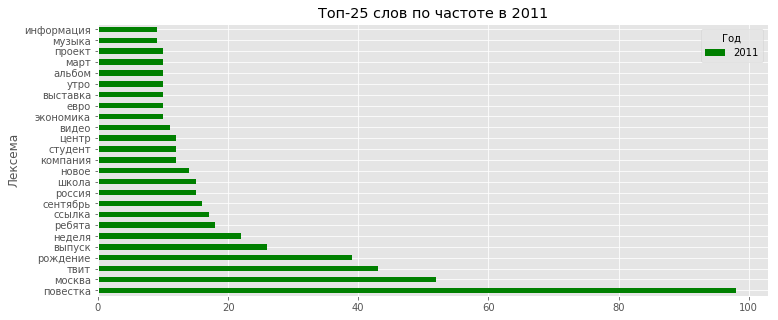

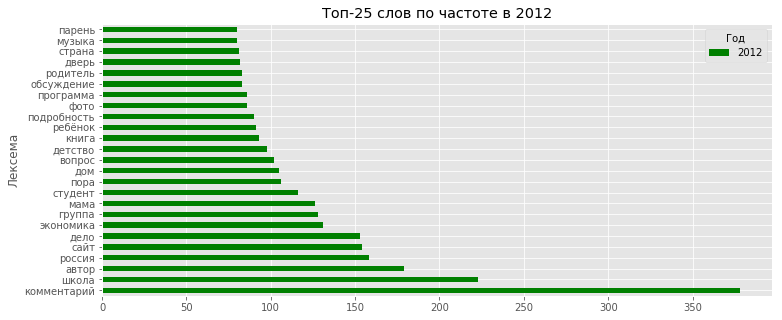

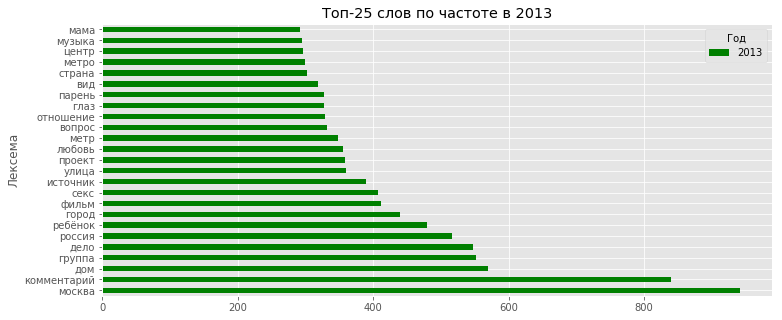

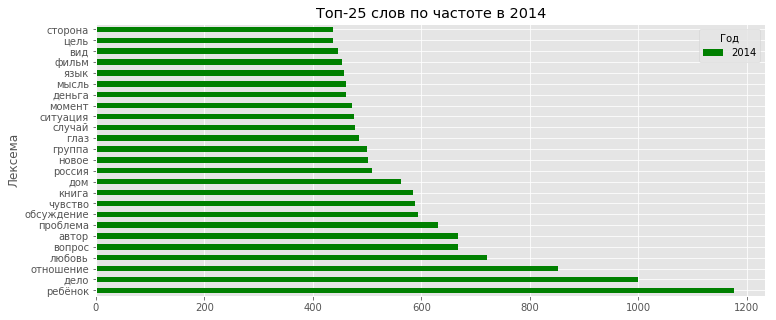

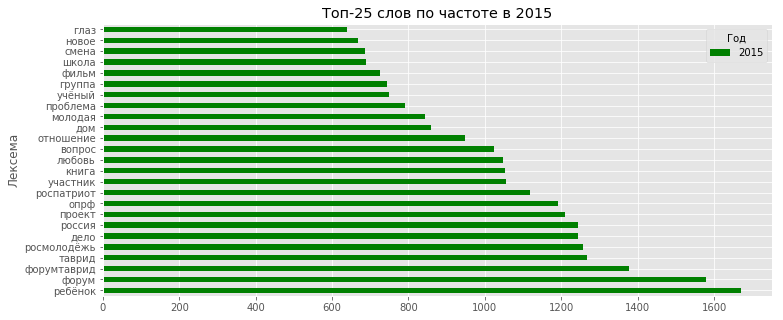

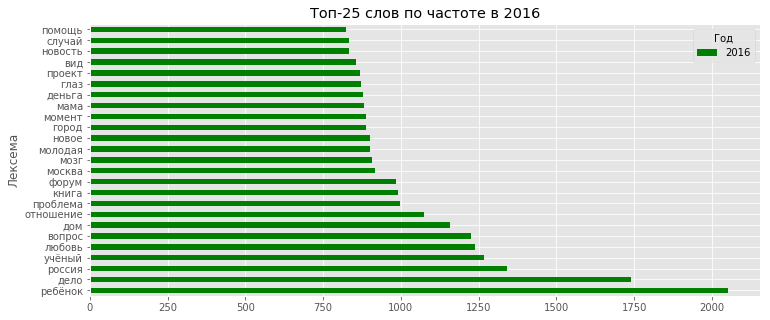

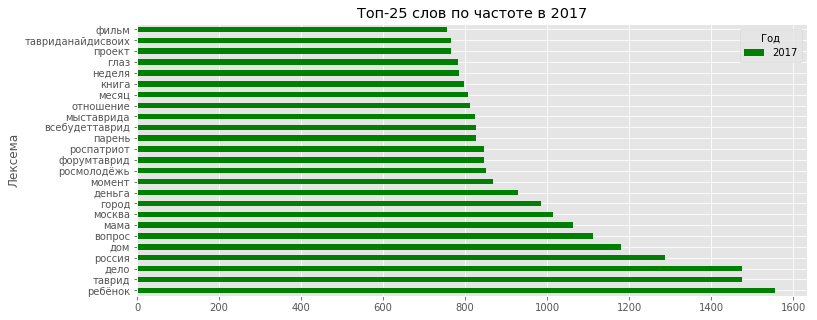

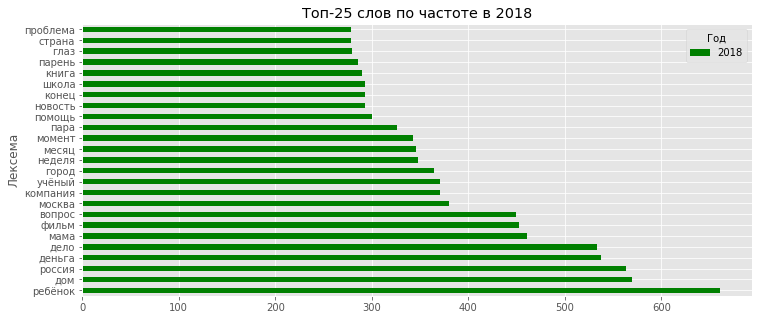

In [50]:
vizualization(for_11)
vizualization(for_12)
vizualization(for_13)
vizualization(for_14)
vizualization(for_15)
vizualization(for_16)
vizualization(for_17)
vizualization(for_18)

+ Рассмотрим распределение для всех частей речи

### 2011

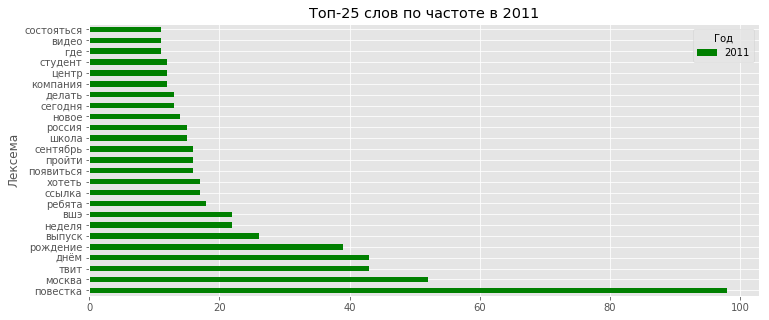

In [51]:
vizualization(res.sort_values(by=res.columns[2], ascending=False)[:25][['Лексема', 2011]])
# cloud(res.sort_values(by=res.columns[2], ascending=False)[:25][['Лексема', 2011]])

### 2012

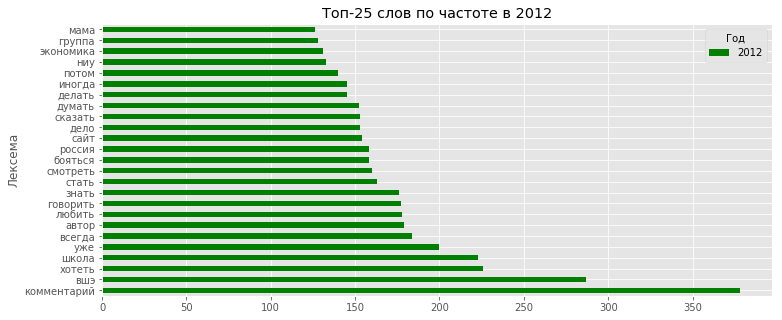

In [52]:
vizualization(res.sort_values(by=res.columns[3], ascending=False)[:25][['Лексема', 2012]])
# cloud(res.sort_values(by=res.columns[3], ascending=False)[:25][['Лексема', 2012]])

### 2013

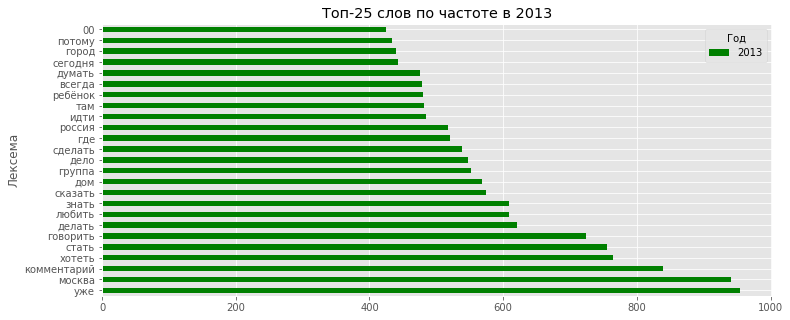

In [53]:
vizualization(res.sort_values(by=res.columns[4], ascending=False)[:25][['Лексема', 2013]])
# cloud(res.sort_values(by=res.columns[4], ascending=False)[:25][['Лексема', 2013]])

### 2014

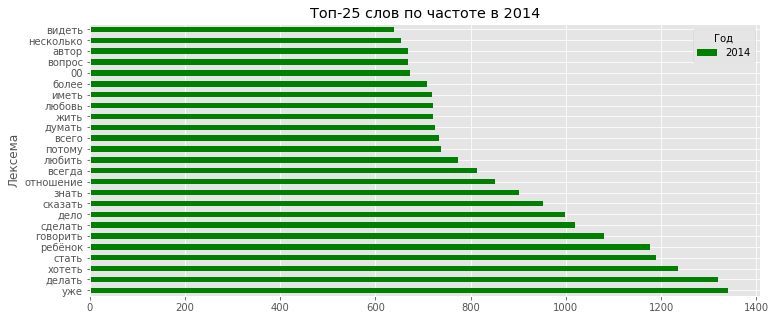

In [54]:
vizualization(res.sort_values(by=res.columns[5], ascending=False)[:25][['Лексема', 2014]])
# cloud(res.sort_values(by=res.columns[5], ascending=False)[:25][['Лексема', 2014]])

### 2015

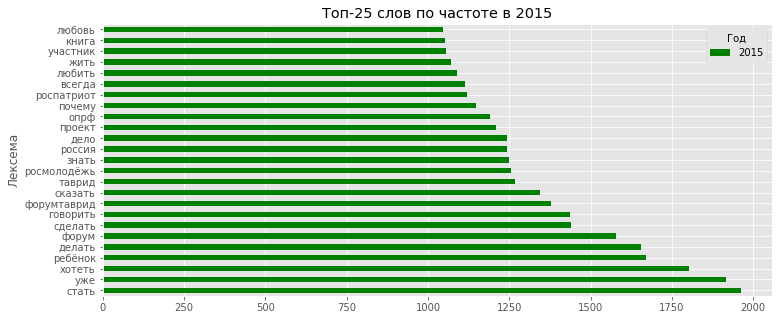

In [55]:
vizualization(res.sort_values(by=res.columns[6], ascending=False)[:25][['Лексема', 2015]])
# cloud(res.sort_values(by=res.columns[6], ascending=False)[:25][['Лексема', 2015]])

### 2016

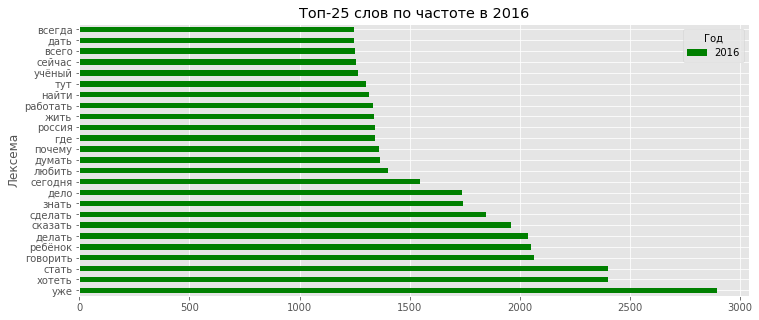

In [56]:
vizualization(res.sort_values(by=res.columns[7], ascending=False)[:25][['Лексема', 2016]])
# cloud(res.sort_values(by=res.columns[7], ascending=False)[:25][['Лексема', 2016]])

### 2017

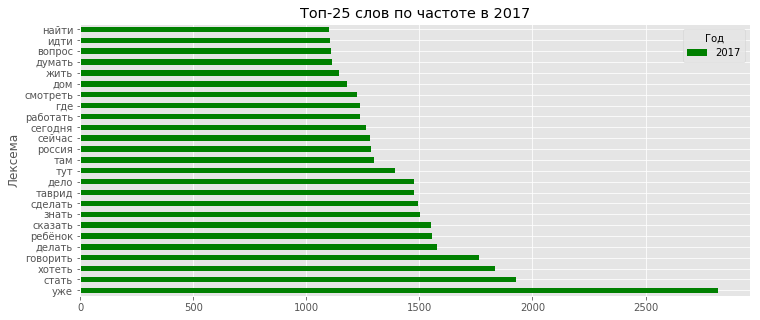

In [57]:
vizualization(res.sort_values(by=res.columns[8], ascending=False)[:25][['Лексема', 2017]])
# cloud(res.sort_values(by=res.columns[8], ascending=False)[:25][['Лексема', 2017]])

### 2018

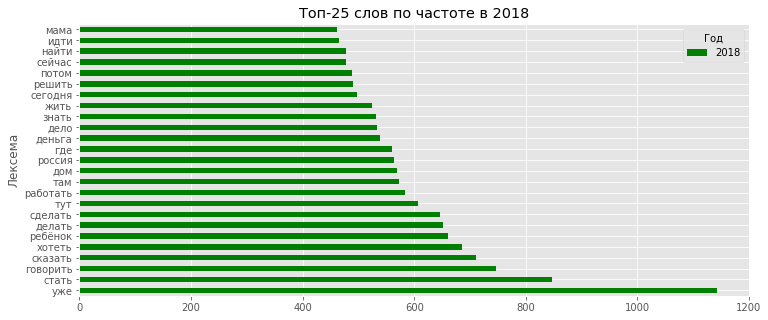

In [58]:
vizualization(res.sort_values(by=res.columns[9], ascending=False)[:25][['Лексема', 2018]])
# cloud(res.sort_values(by=res.columns[9], ascending=False)[:25][['Лексема', 2018]])

### Теперь то же самое по мясецам:

In [59]:
res = df.groupby(['Лексема','Часть речи'])['Месяц'].value_counts().unstack().reset_index().fillna(0)
res = clean(res)

In [60]:
test.sort_values(by=test.columns[2], ascending=False)[:25]

Год        Лексема Часть речи  2011   2012   2013   2014    2015    2016  \
69631     повестка       NOUN  98.0   70.0    3.0   13.0    24.0    15.0   
51454       москва       NOUN  52.0   78.0  941.0  259.0   494.0   917.0   
96477         твит       NOUN  43.0   24.0   10.0   16.0    10.0     8.0   
83961     рождение       NOUN  39.0   40.0   84.0  157.0   205.0   279.0   
16008       выпуск       NOUN  26.0   17.0   66.0   48.0   100.0   122.0   
55536       неделя       NOUN  22.0   60.0  249.0  429.0   553.0   808.0   
82442       ребята       NOUN  18.0   41.0  157.0  159.0   300.0   346.0   
92918       ссылка       NOUN  17.0   61.0   83.0   95.0   115.0   242.0   
87880     сентябрь       NOUN  16.0   45.0   82.0   82.0   143.0   203.0   
84374       россия       NOUN  15.0  158.0  517.0  509.0  1244.0  1341.0   
110615       школа       NOUN  15.0  223.0  290.0  318.0   690.0   809.0   
58448        новое       NOUN  14.0   39.0  250.0  501.0   668.0   902.0   
39702     компания       NOUN  12.0   65.0  179.0  165.0   302.0   530.0   
94284      студент       NOUN  12.0  116.0  163.0  314.0   555.0   533.0   
107680       центр       NOUN  12.0   56.0  296.0  158.0   293.0   426.0   
12048        видео       NOUN  11.0   51.0   90.0  129.0   208.0   394.0   
111978   экономика       NOUN  10.0  131.0  108.0  101.0   150.0   161.0   
26787         евро       NOUN  10.0    8.0   15.0   34.0    32.0    57.0   
16284     выставка       NOUN  10.0   10.0   98.0   75.0   131.0   184.0   
102453        утро       NOUN  10.0   52.0  234.0  263.0   386.0   500.0   
1858        альбом       NOUN  10.0   58.0  260.0  298.0   381.0   459.0   
47454         март       NOUN  10.0   20.0  152.0  104.0   143.0   164.0   
77526       проект       NOUN  10.0   66.0  358.0  281.0  1209.0   869.0   
52044       музыка       NOUN   9.0   80.0  295.0  309.0   440.0   507.0   
34381   информация       NOUN   9.0   55.0   93.0  322.0   398.0   610.0   

Год       2017   2018  
69631     12.0   20.0  
51454   1015.0  380.0  
96477     22.0    3.0  
83961    204.0  114.0  
16008    102.0   52.0  
55536    786.0  348.0  
82442    256.0  114.0  
92918    212.0   88.0  
87880    176.0   18.0  
84374   1287.0  564.0  
110615   690.0  293.0  
58448    687.0  267.0  
39702    592.0  371.0  
94284    244.0  211.0  
107680   368.0  172.0  
12048    472.0  163.0  
111978   110.0   58.0  
26787     48.0   17.0  
16284    122.0   58.0  
102453   480.0  186.0  
1858     535.0  111.0  
47454    136.0  153.0  
77526    766.0  277.0  
52044    694.0  173.0  
34381    378.0  155.0

+ Рассмотрим только для существительных

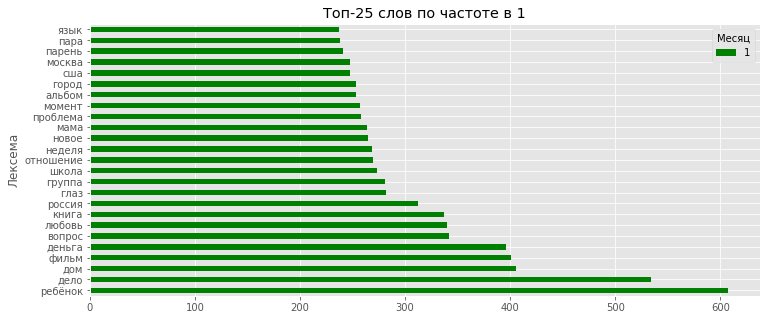

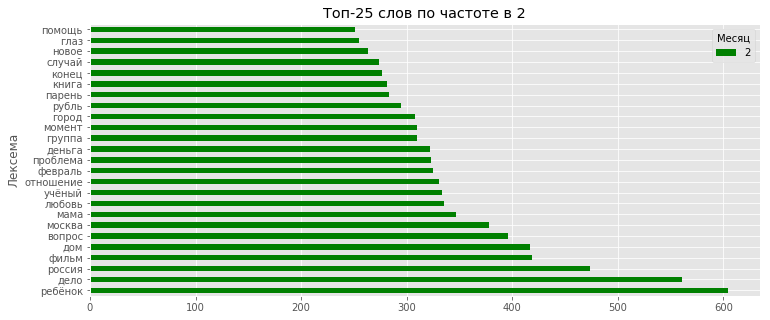

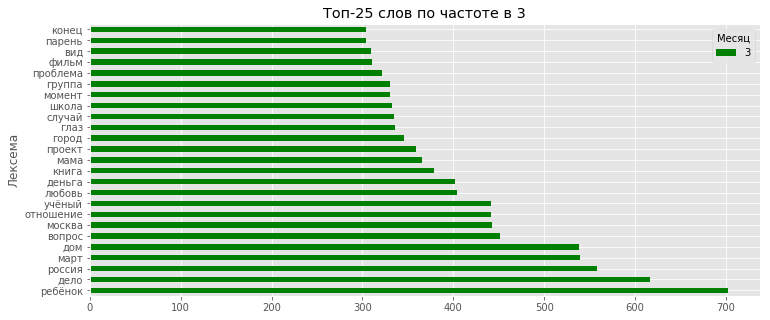

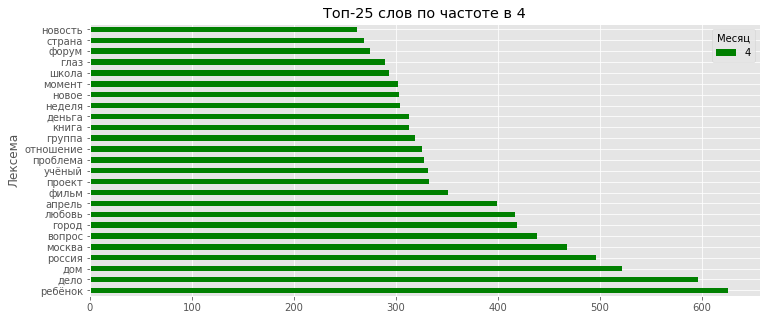

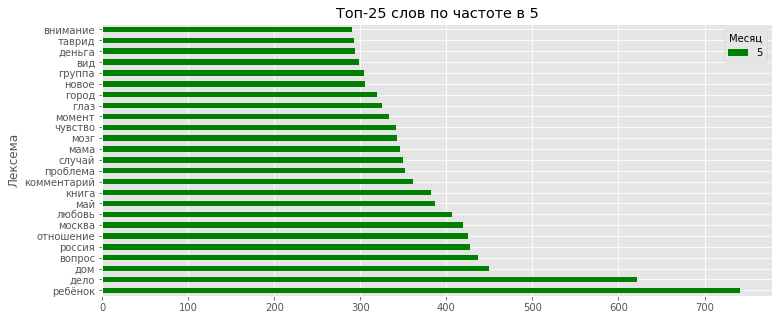

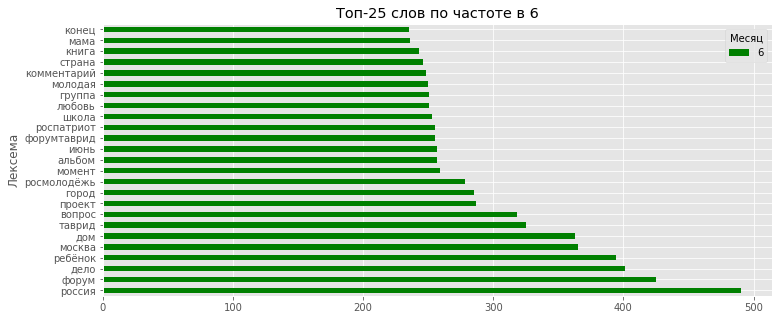

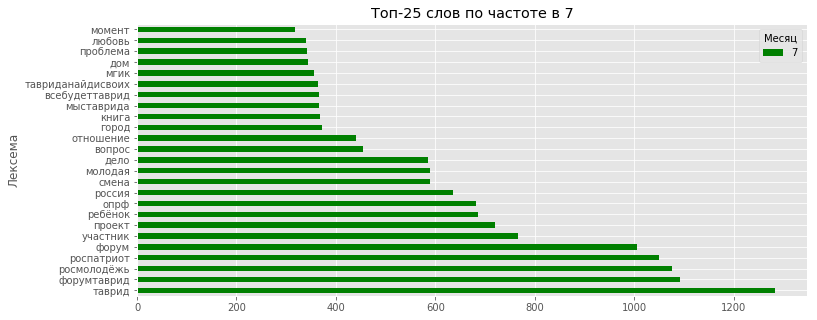

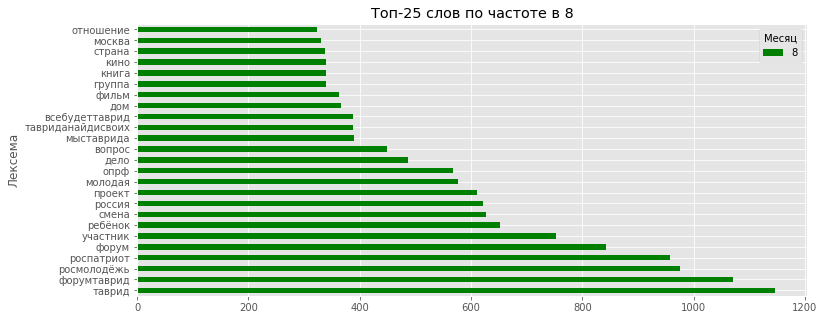

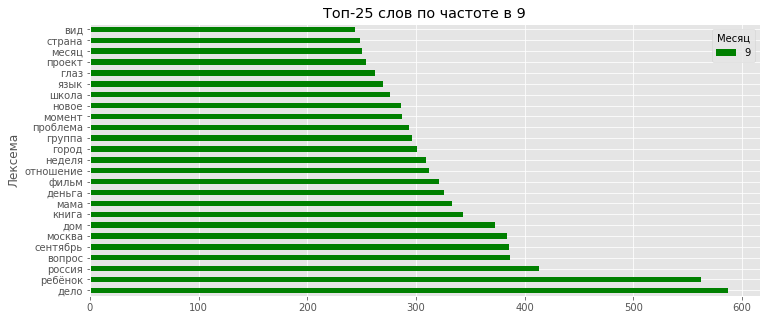

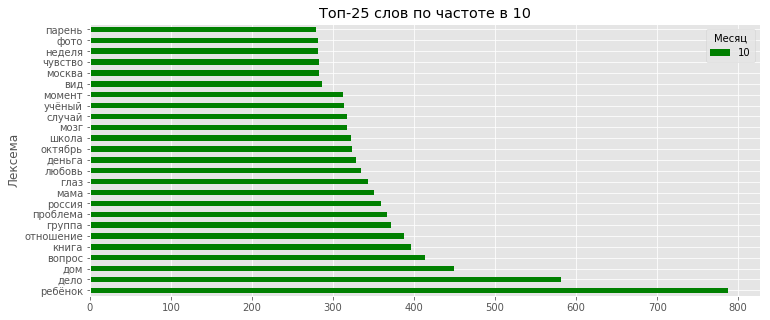

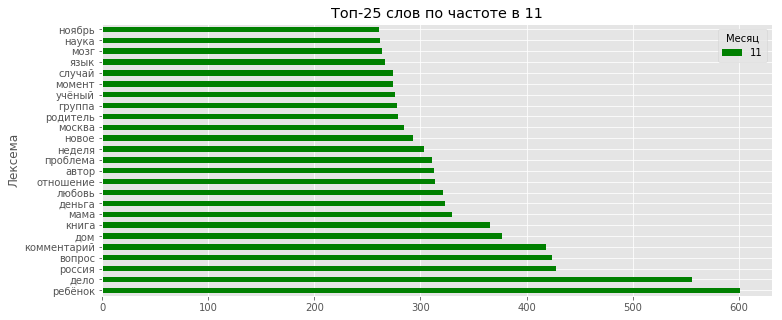

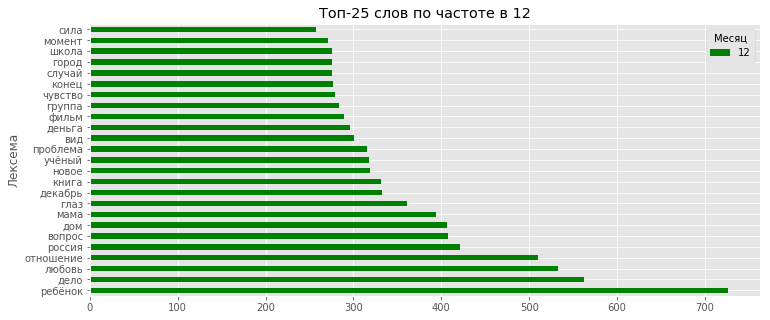

In [63]:
test = res[res['Часть речи'] == 'NOUN']
i = 1
while i <= 12:
    vizualization(test.sort_values(by=test.columns[i+1], ascending=False)[['Лексема', i]][:25])
    i += 1


### Январь

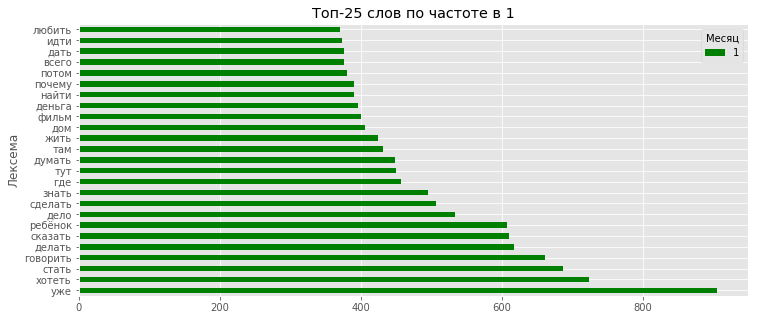

In [64]:
vizualization(res.sort_values(by=res.columns[2], ascending=False)[:25][['Лексема', 1]])
# cloud(res.sort_values(by=res.columns[2], ascending=False)[:25][['Лексема', 1]])

### Февраль

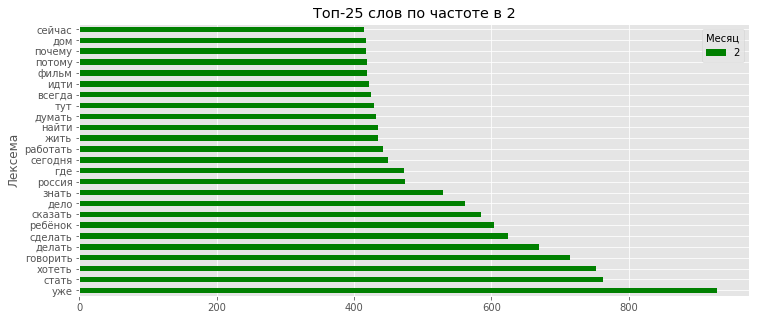

In [65]:
vizualization(res.sort_values(by=res.columns[3], ascending=False)[:25][['Лексема', 2]])
# cloud(res.sort_values(by=res.columns[3], ascending=False)[:25][['Лексема', 2]])

### Март

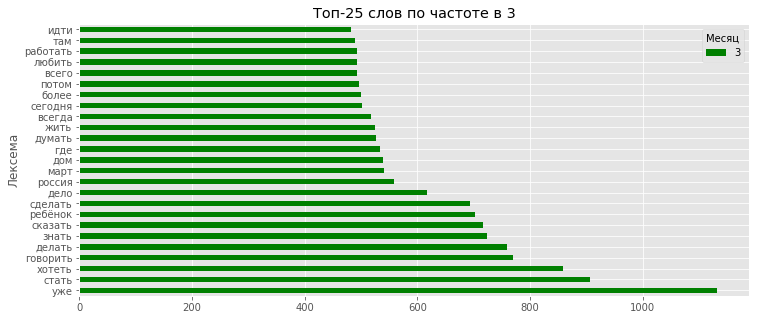

In [66]:
vizualization(res.sort_values(by=res.columns[4], ascending=False)[:25][['Лексема', 3]])
# cloud(res.sort_values(by=res.columns[4], ascending=False)[:25][['Лексема', 3]])

### Апрель

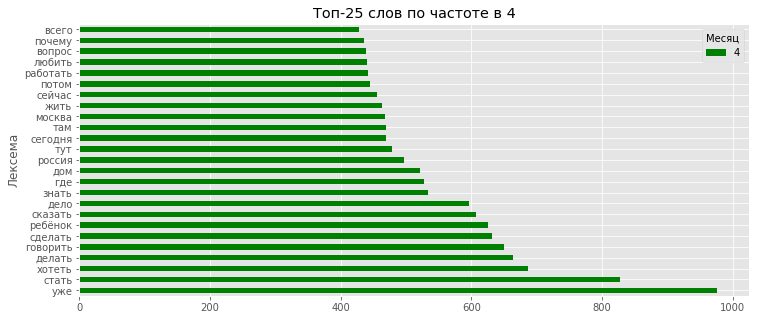

In [67]:
vizualization(res.sort_values(by=res.columns[5], ascending=False)[:25][['Лексема', 4]])
# cloud(res.sort_values(by=res.columns[5], ascending=False)[:25][['Лексема', 4]])

### Май

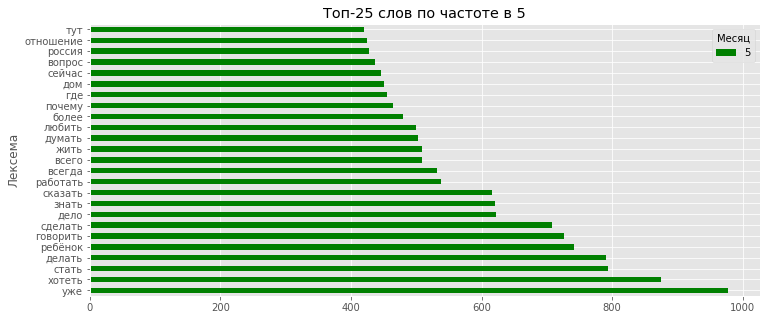

In [68]:
vizualization(res.sort_values(by=res.columns[6], ascending=False)[:25][['Лексема', 5]])
# cloud(res.sort_values(by=res.columns[6], ascending=False)[:25][['Лексема', 5]])

### Июнь

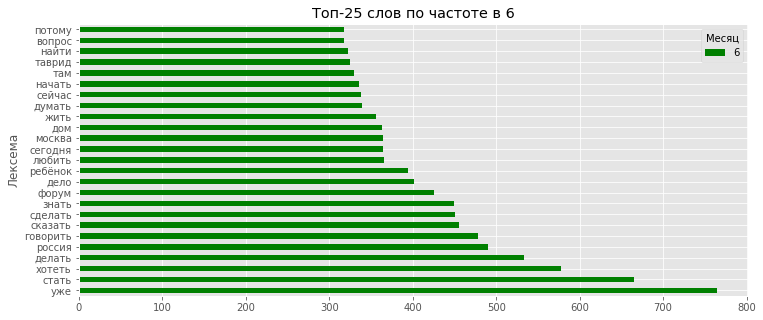

In [69]:
vizualization(res.sort_values(by=res.columns[7], ascending=False)[:25][['Лексема', 6]])
# cloud(res.sort_values(by=res.columns[7], ascending=False)[:25][['Лексема', 6]])

### Июль

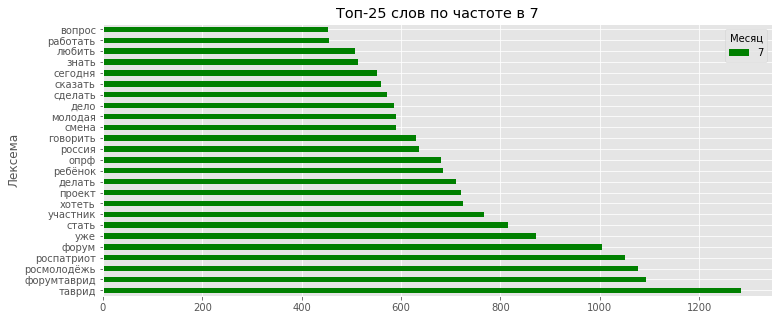

In [70]:
vizualization(res.sort_values(by=res.columns[8], ascending=False)[:25][['Лексема', 7]])
# cloud(res.sort_values(by=res.columns[8], ascending=False)[:25][['Лексема', 7]])

### Август

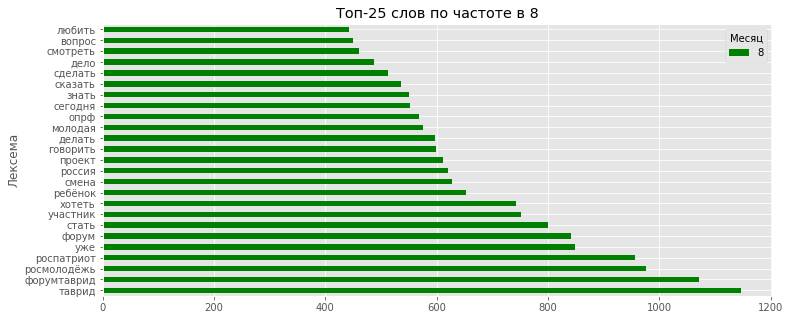

In [71]:
vizualization(res.sort_values(by=res.columns[9], ascending=False)[:25][['Лексема', 8]])
# cloud(res.sort_values(by=res.columns[9], ascending=False)[:25][['Лексема', 8]])

### Сентябрь

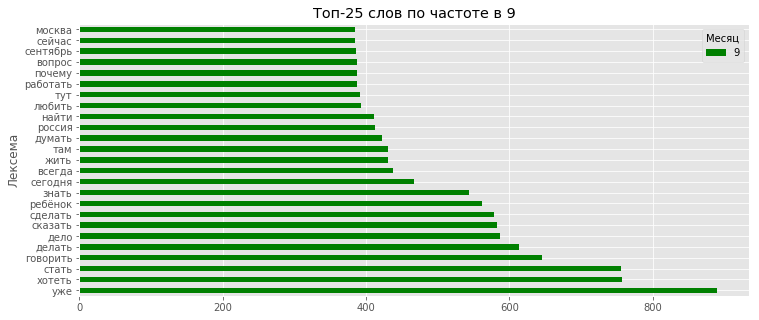

In [72]:
vizualization(res.sort_values(by=res.columns[10], ascending=False)[:25][['Лексема', 9]])
# cloud(res.sort_values(by=res.columns[10], ascending=False)[:25][['Лексема', 9]])

### Октябрь

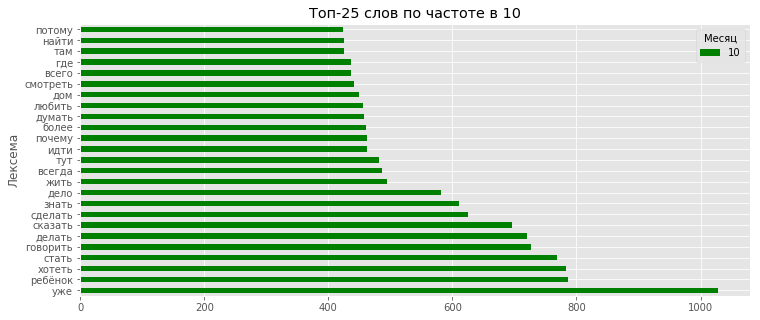

In [73]:
vizualization(res.sort_values(by=res.columns[11], ascending=False)[:25][['Лексема', 10]])
# cloud(res.sort_values(by=res.columns[11], ascending=False)[:25][['Лексема', 10]])

### Ноябрь

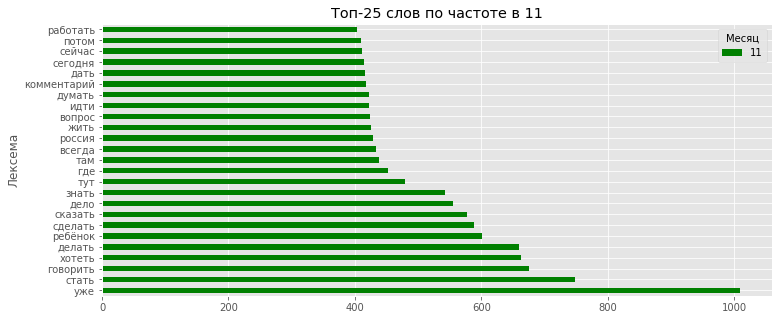

In [74]:
vizualization(res.sort_values(by=res.columns[12], ascending=False)[:25][['Лексема', 11]])
# cloud(res.sort_values(by=res.columns[12], ascending=False)[:25][['Лексема', 11]])

### Декабрь

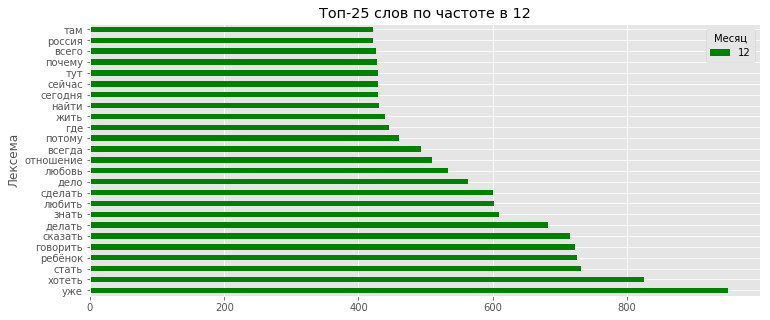

In [75]:
vizualization(res.sort_values(by=res.columns[13], ascending=False)[:25][['Лексема', 12]])
# cloud(res.sort_values(by=res.columns[13], ascending=False)[:25][['Лексема', 12]])

### Теперь то же самое для часов

In [76]:
res = df.groupby(['Лексема','Часть речи'])['Час'].value_counts().unstack().reset_index().fillna(0)
res = clean(res)

+ Рассмотрим только для существительных

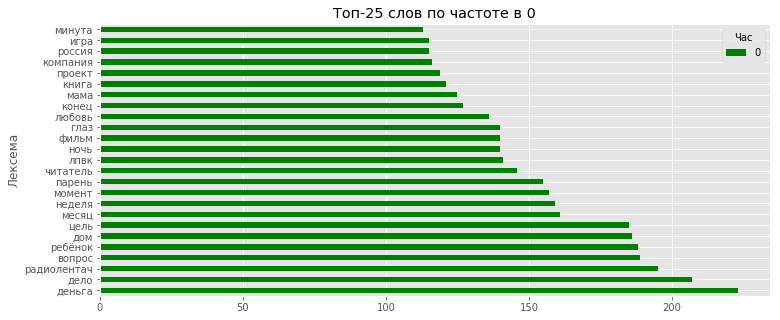

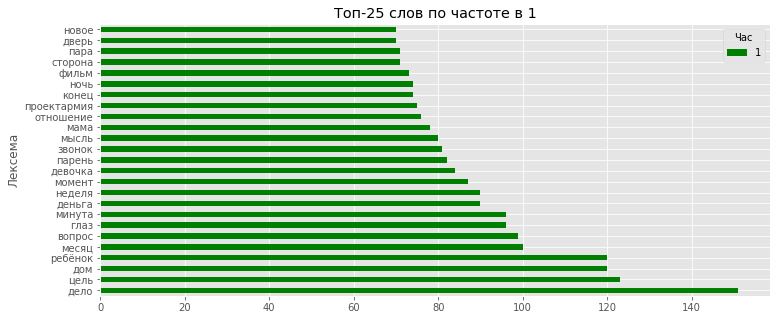

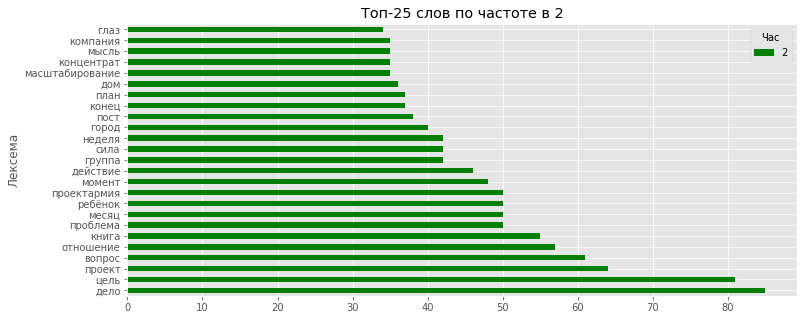

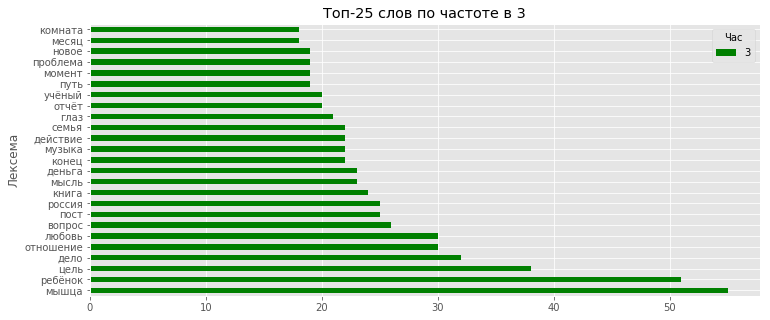

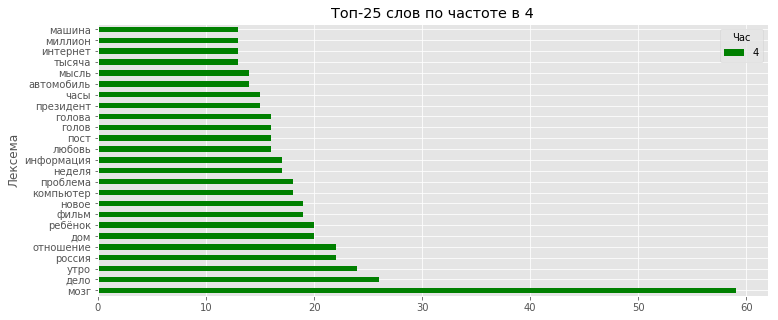

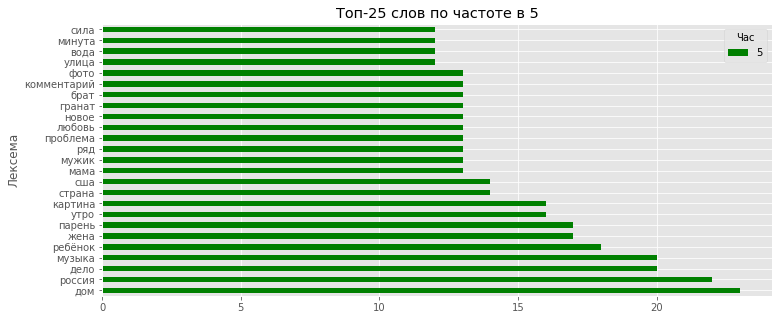

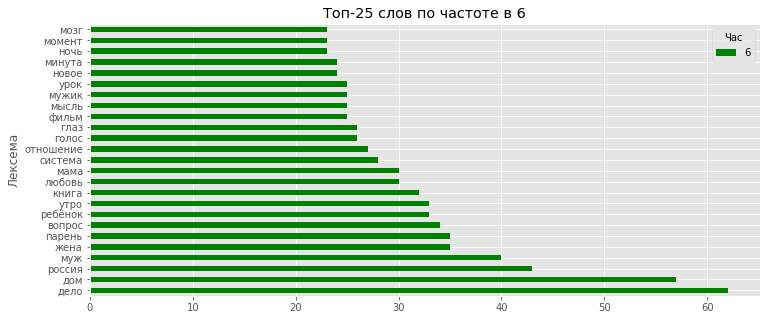

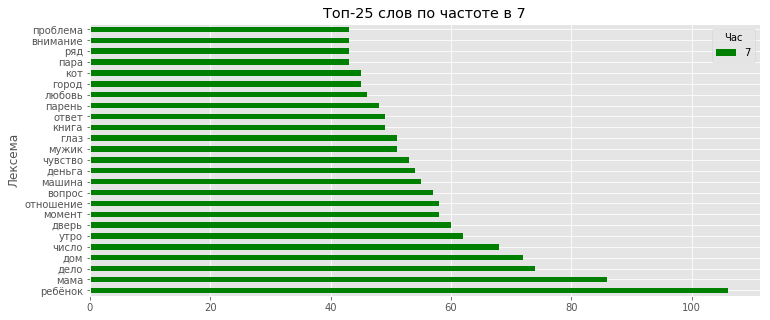

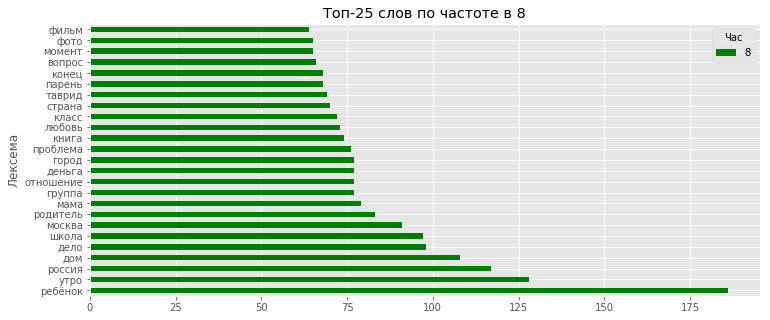

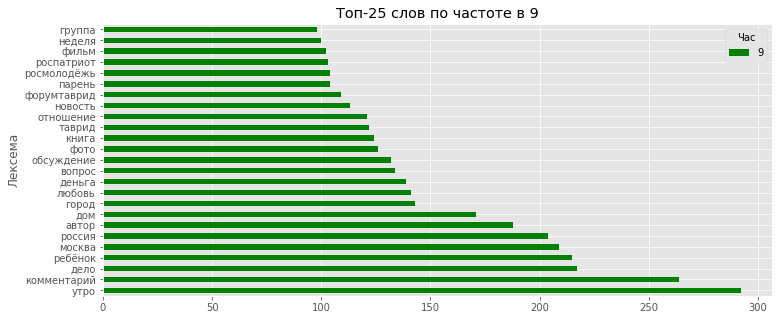

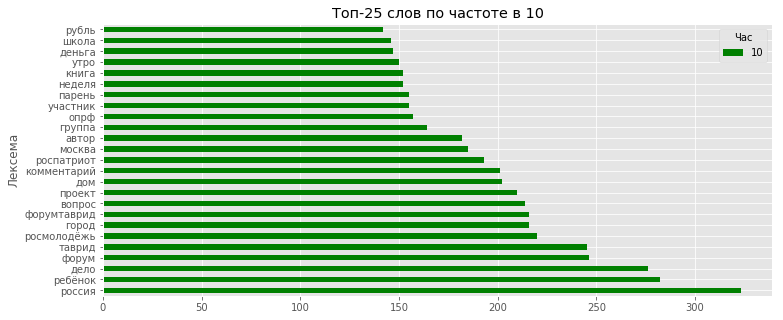

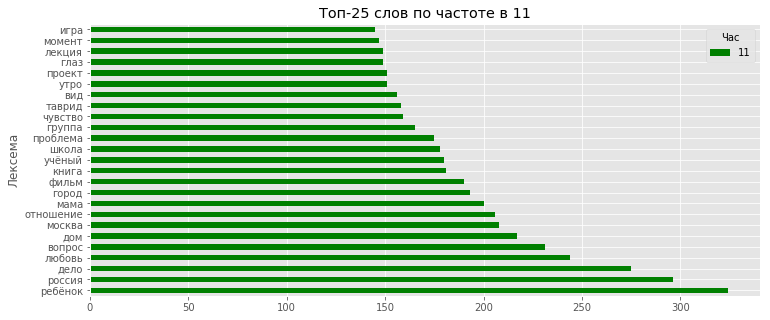

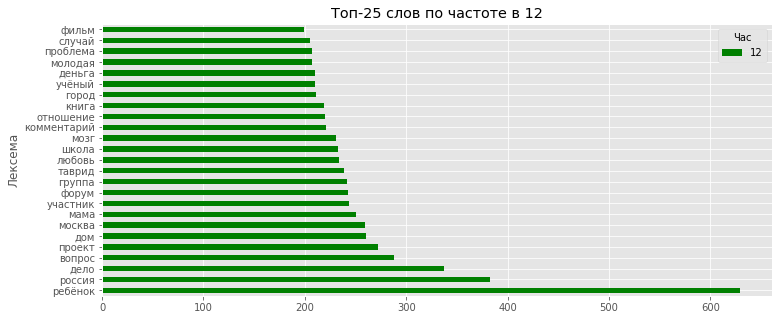

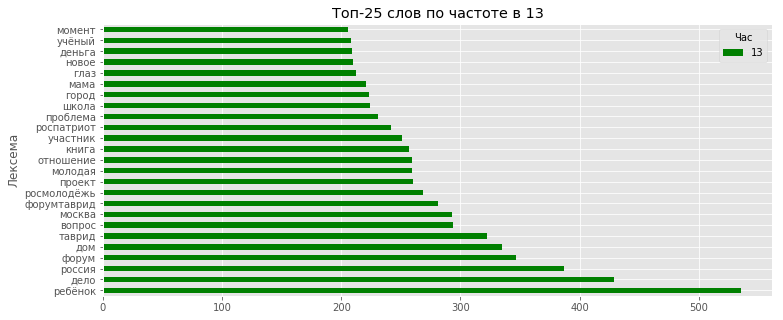

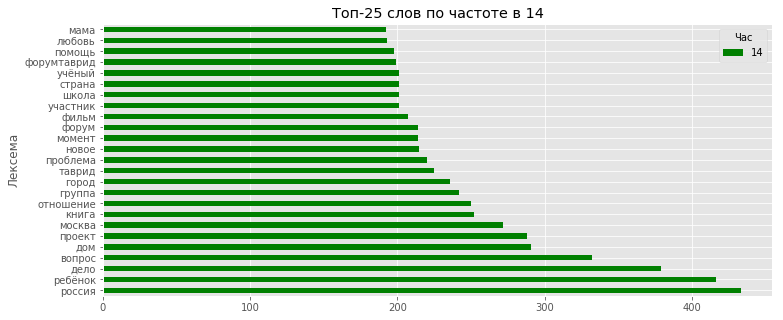

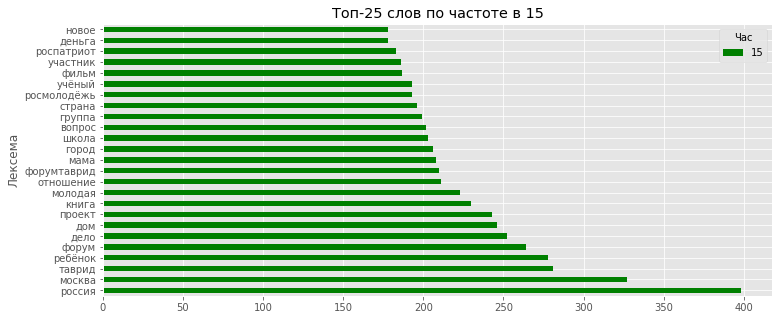

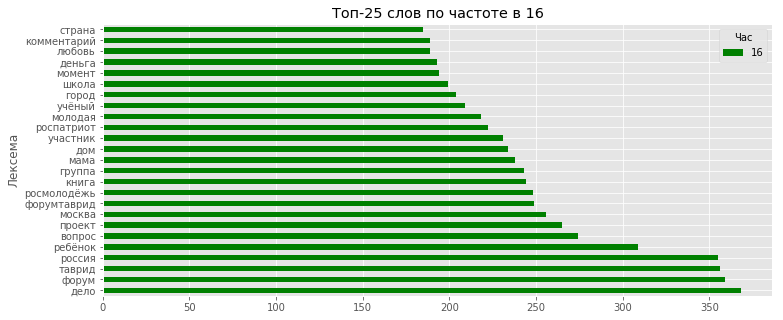

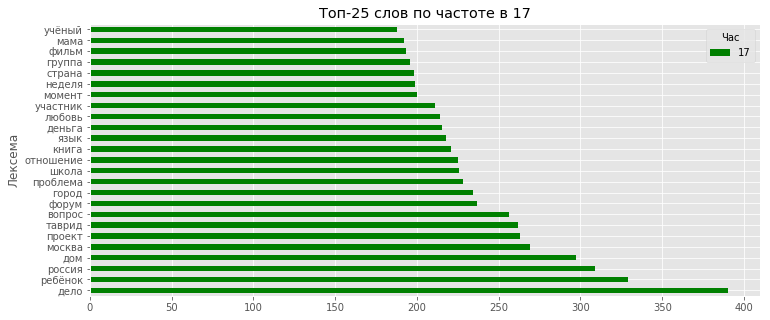

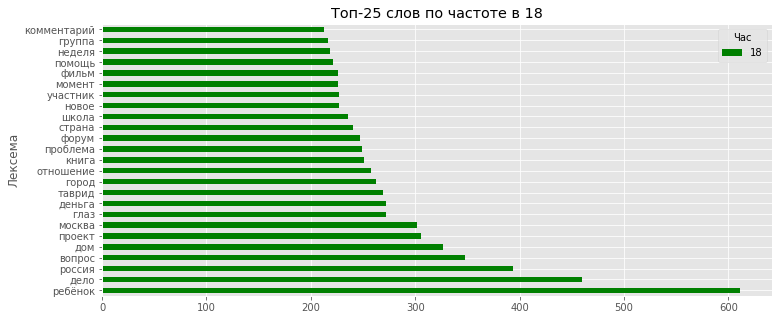

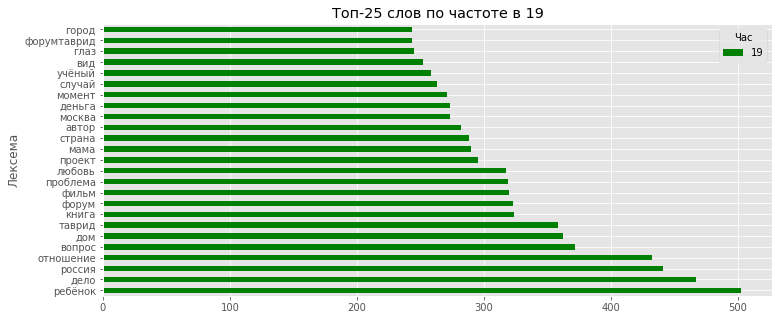

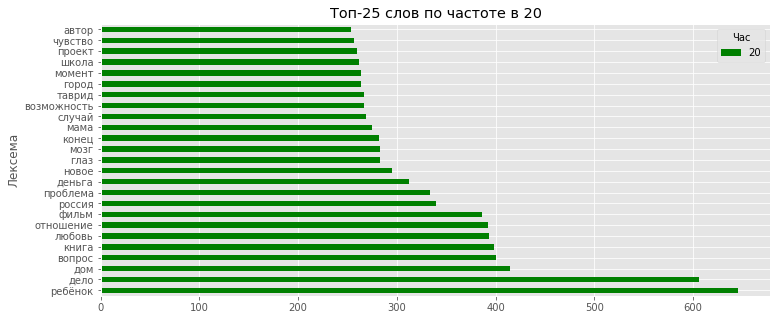

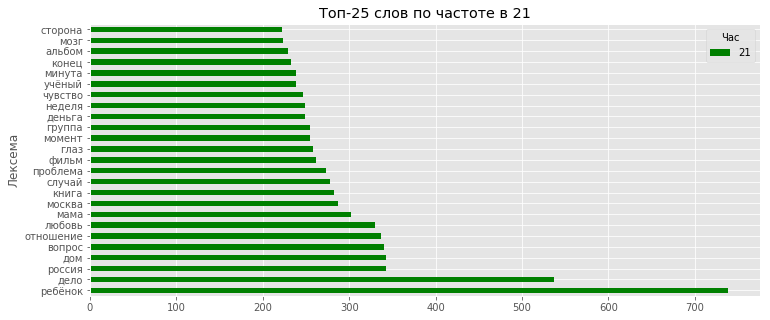

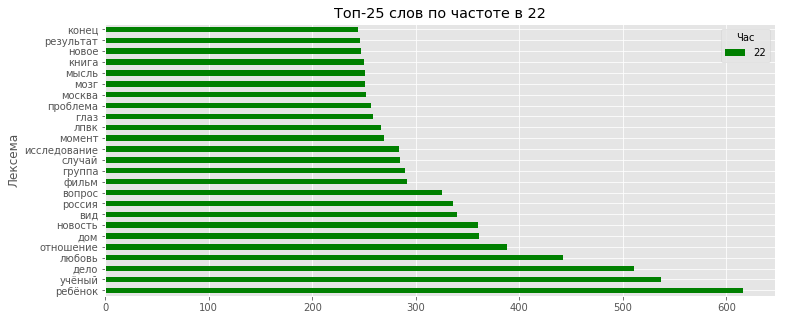

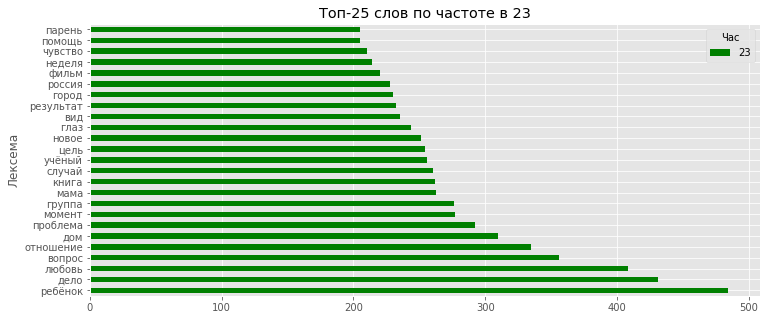

In [77]:
test = res[res['Часть речи'] == 'NOUN']
i = 0
while i <= 23:
    vizualization(test.sort_values(by=test.columns[i+2], ascending=False)[['Лексема', i]][:25])
    i += 1


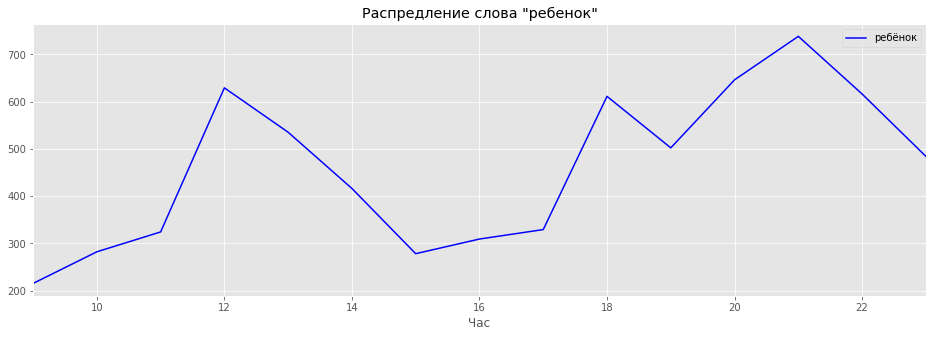

In [78]:
pl = res[res['Лексема'] == 'ребёнок']
pl = pl.drop('Часть речи', axis = 1).transpose()
pl.columns = ['ребёнок']
pl[10:].plot(figsize=(16, 5), color = 'blue')
plt.title('Распредление слова "ребенок"')
plt.savefig('Распредление слова "ребенок".png', format='png')
plt.show()

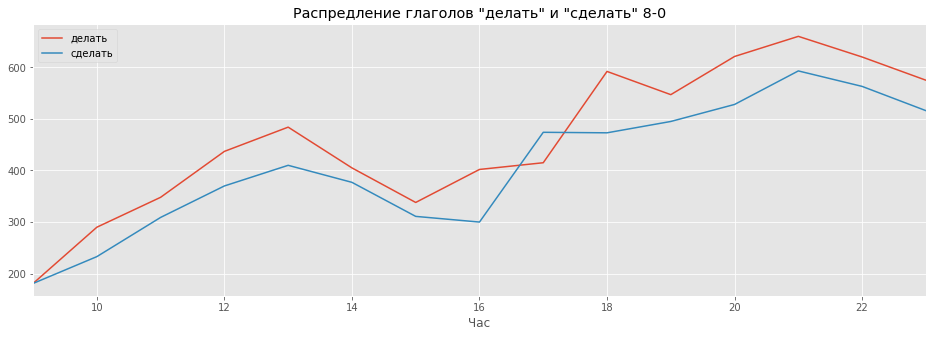

In [79]:
pl = res[(res['Лексема'] == 'делать')|(res['Лексема'] == 'сделать')]
pl = pl.drop('Часть речи', axis = 1).transpose()
pl.columns = ['делать', 'сделать']
pl[10:].plot(figsize=(16, 5))
plt.title('Распредление глаголов "делать" и "сделать" 8-0')
plt.savefig('Распредление глаголов "делать" и "сделать" 8-0.png', format='png')
plt.show()

### 0 (12 ночи)

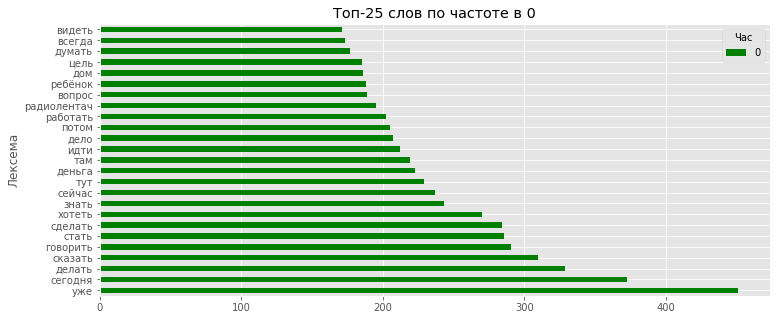

In [80]:
vizualization(res.sort_values(by=res.columns[2], ascending=False)[:25][['Лексема', 0]])
# cloud(res.sort_values(by=res.columns[2], ascending=False)[:25][['Лексема', 0]])

### 1 

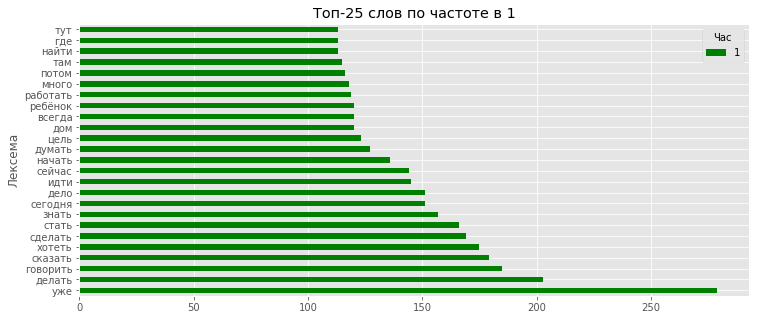

In [81]:
vizualization(res.sort_values(by=res.columns[3], ascending=False)[:25][['Лексема', 1]])
# cloud(res.sort_values(by=res.columns[3], ascending=False)[:25][['Лексема', 1]])

### 2

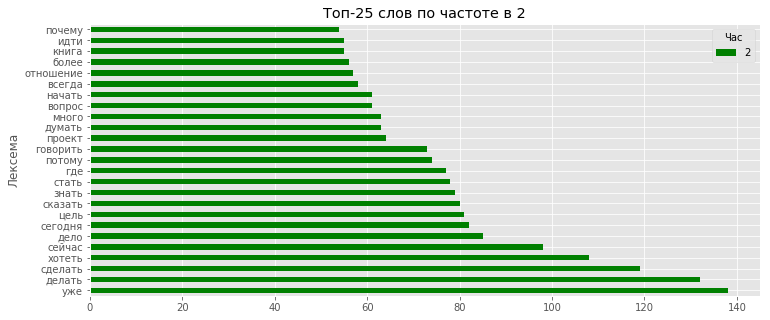

In [82]:
vizualization(res.sort_values(by=res.columns[4], ascending=False)[:25][['Лексема', 2]])
# cloud(res.sort_values(by=res.columns[4], ascending=False)[:25][['Лексема', 2]])

### 3 

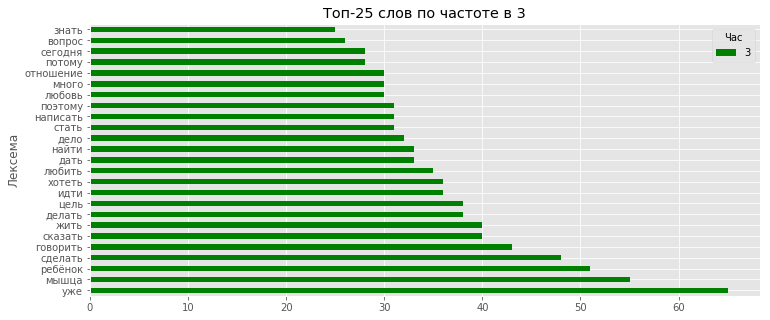

In [83]:
vizualization(res.sort_values(by=res.columns[5], ascending=False)[:25][['Лексема', 3]])
# cloud(res.sort_values(by=res.columns[5], ascending=False)[:25][['Лексема', 3]])

### 4

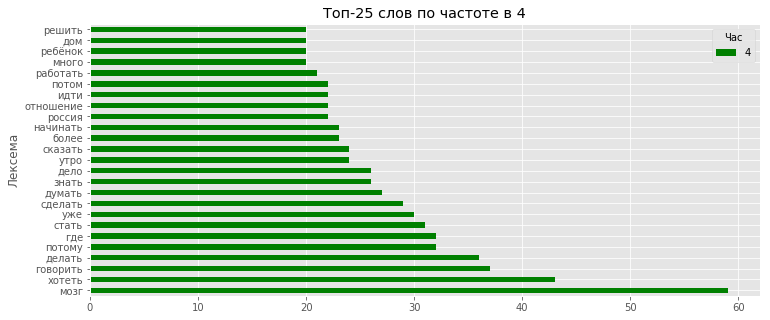

In [84]:
vizualization(res.sort_values(by=res.columns[6], ascending=False)[:25][['Лексема', 4]])
# cloud(res.sort_values(by=res.columns[6], ascending=False)[:25][['Лексема', 4]])

### 5

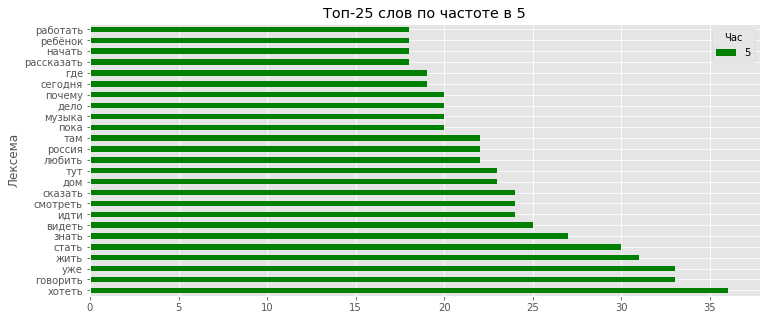

In [85]:
vizualization(res.sort_values(by=res.columns[7], ascending=False)[:25][['Лексема', 5]])
# cloud(res.sort_values(by=res.columns[7], ascending=False)[:25][['Лексема', 5]])

### 6 

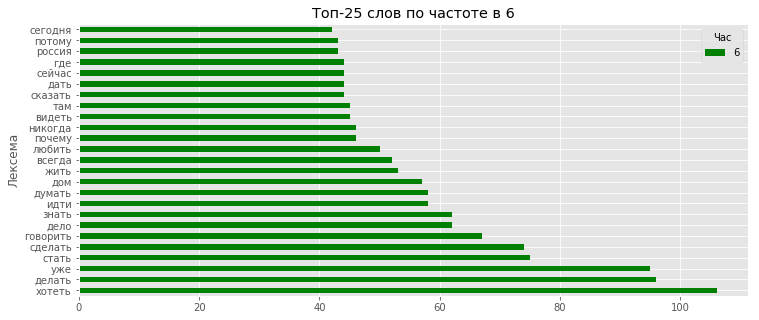

In [86]:
vizualization(res.sort_values(by=res.columns[8], ascending=False)[:25][['Лексема', 6]])
# cloud(res.sort_values(by=res.columns[8], ascending=False)[:25][['Лексема', 6]])

### 7 

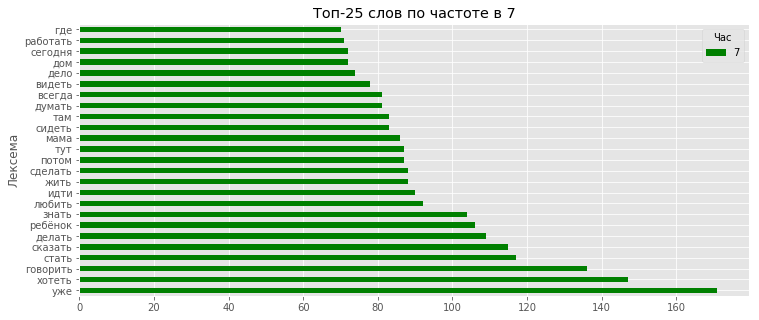

In [87]:
vizualization(res.sort_values(by=res.columns[9], ascending=False)[:25][['Лексема', 7]])
# cloud(res.sort_values(by=res.columns[9], ascending=False)[:25][['Лексема', 7]])

### 8 

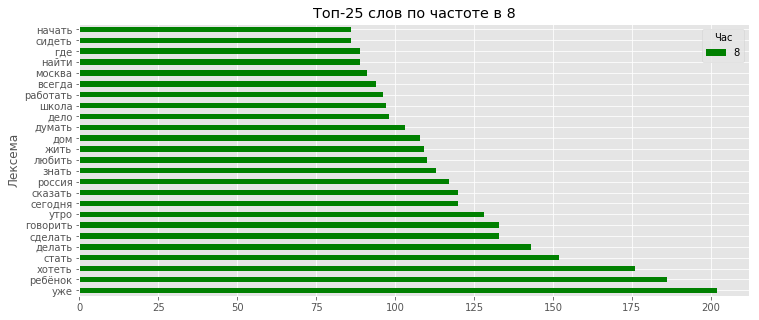

In [88]:
vizualization(res.sort_values(by=res.columns[10], ascending=False)[:25][['Лексема', 8]])
# cloud(res.sort_values(by=res.columns[10], ascending=False)[:25][['Лексема', 8]])

### 9 

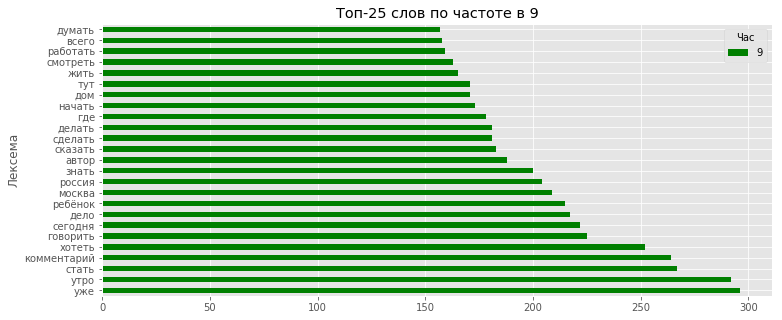

In [89]:
vizualization(res.sort_values(by=res.columns[11], ascending=False)[:25][['Лексема', 9]])
# cloud(res.sort_values(by=res.columns[11], ascending=False)[:25][['Лексема', 9]])

### 10

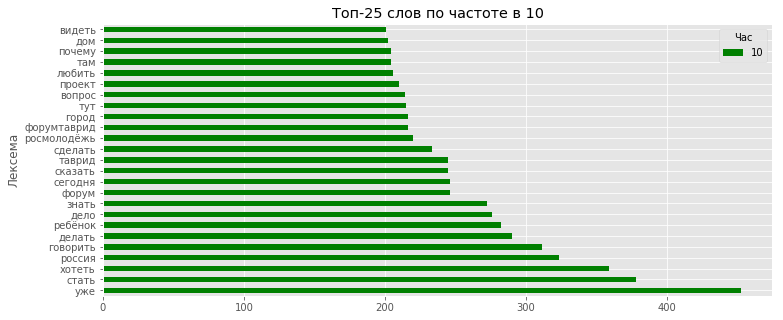

In [90]:
vizualization(res.sort_values(by=res.columns[12], ascending=False)[:25][['Лексема', 10]])
# cloud(res.sort_values(by=res.columns[12], ascending=False)[:25][['Лексема', 10]])

### 11

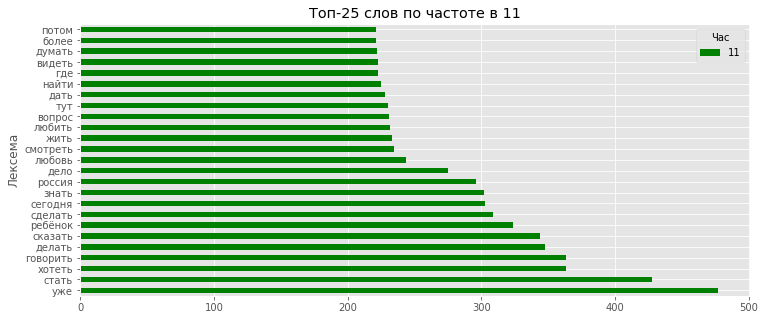

In [91]:
vizualization(res.sort_values(by=res.columns[13], ascending=False)[:25][['Лексема', 11]])
# cloud(res.sort_values(by=res.columns[13], ascending=False)[:25][['Лексема', 11]])

### 12

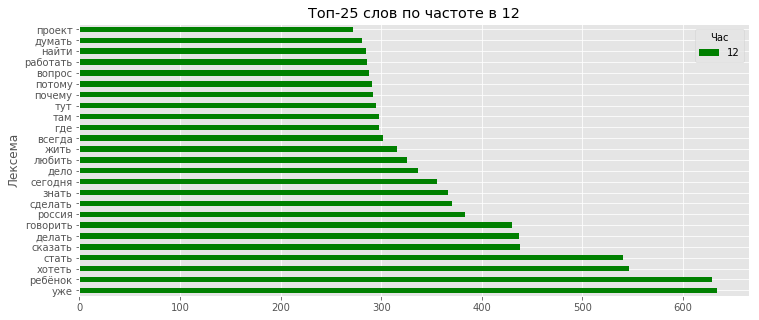

In [92]:
vizualization(res.sort_values(by=res.columns[14], ascending=False)[:25][['Лексема', 12]])
# cloud(res.sort_values(by=res.columns[14], ascending=False)[:25][['Лексема', 12]])

### 13

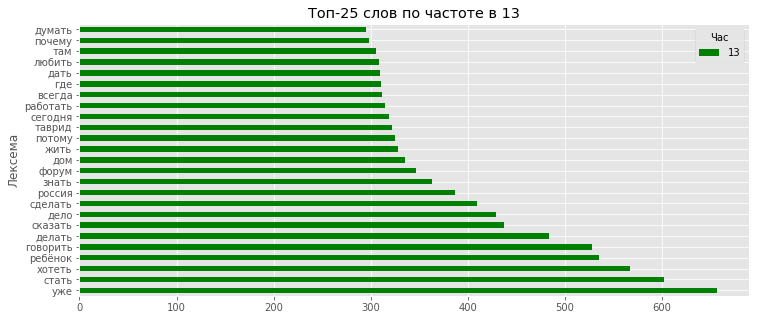

In [93]:
vizualization(res.sort_values(by=res.columns[15], ascending=False)[:25][['Лексема', 13]])
# cloud(res.sort_values(by=res.columns[15], ascending=False)[:25][['Лексема', 13]])

### 14

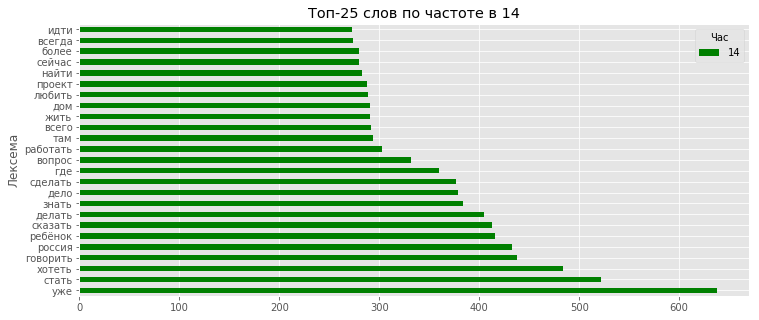

In [94]:
vizualization(res.sort_values(by=res.columns[16], ascending=False)[:25][['Лексема', 14]])
# cloud(res.sort_values(by=res.columns[16], ascending=False)[:25][['Лексема', 14]])

### 15

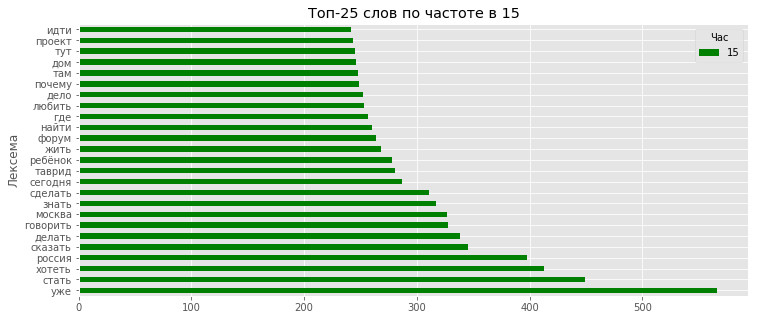

In [95]:
vizualization(res.sort_values(by=res.columns[17], ascending=False)[:25][['Лексема', 15]])
# cloud(res.sort_values(by=res.columns[17], ascending=False)[:25][['Лексема', 15]])

### 16

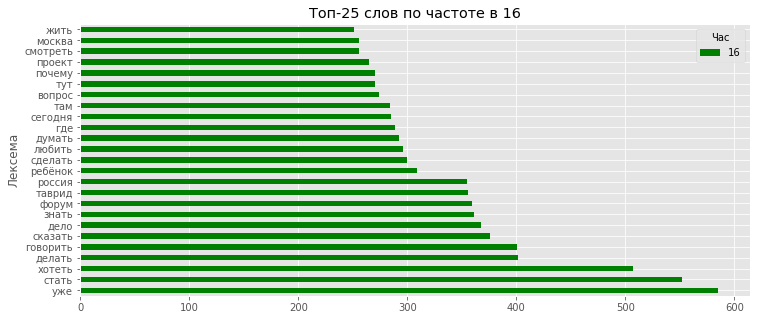

In [96]:
vizualization(res.sort_values(by=res.columns[18], ascending=False)[:25][['Лексема', 16]])
# cloud(res.sort_values(by=res.columns[18], ascending=False)[:25][['Лексема', 16]])

### 17

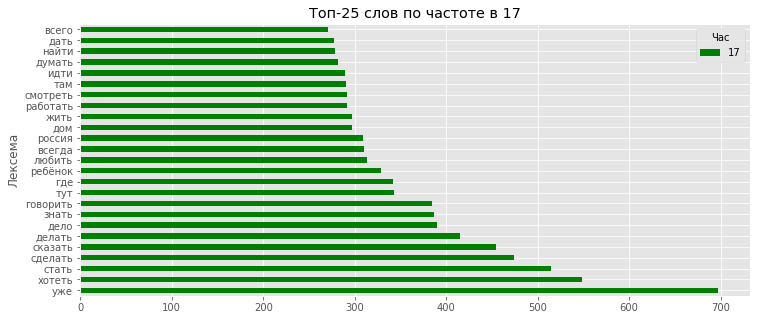

In [98]:
vizualization(res.sort_values(by=res.columns[19], ascending=False)[:25][['Лексема', 17]])
# cloud(res.sort_values(by=res.columns[19], ascending=False)[:25][['Лексема', 17]])

### 18

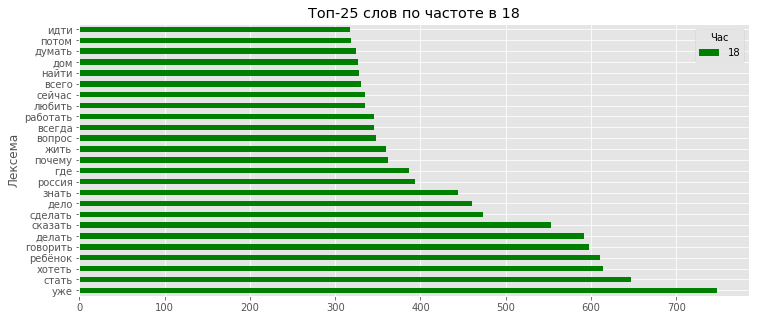

In [99]:
vizualization(res.sort_values(by=res.columns[20], ascending=False)[:25][['Лексема', 18]])
# cloud(res.sort_values(by=res.columns[20], ascending=False)[:25][['Лексема', 18]])

### 19

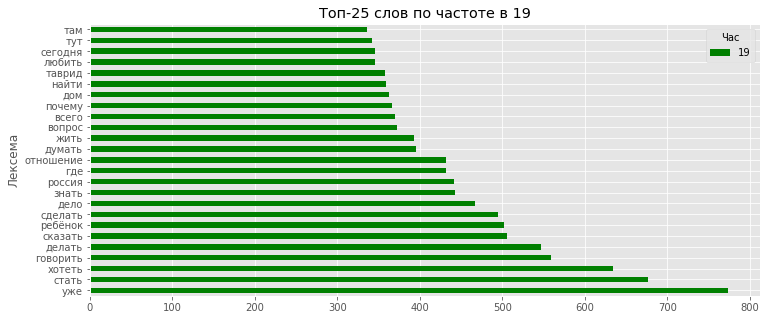

In [100]:
vizualization(res.sort_values(by=res.columns[21], ascending=False)[:25][['Лексема', 19]])
# cloud(res.sort_values(by=res.columns[21], ascending=False)[:25][['Лексема', 19]])

### 20

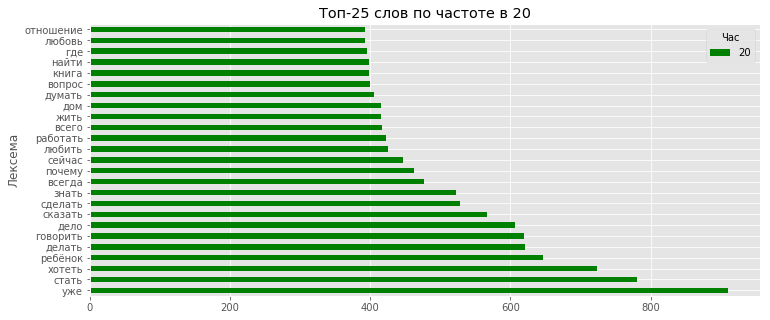

In [101]:
vizualization(res.sort_values(by=res.columns[22], ascending=False)[:25][['Лексема', 20]])
# cloud(res.sort_values(by=res.columns[22], ascending=False)[:25][['Лексема', 20]])

### 21

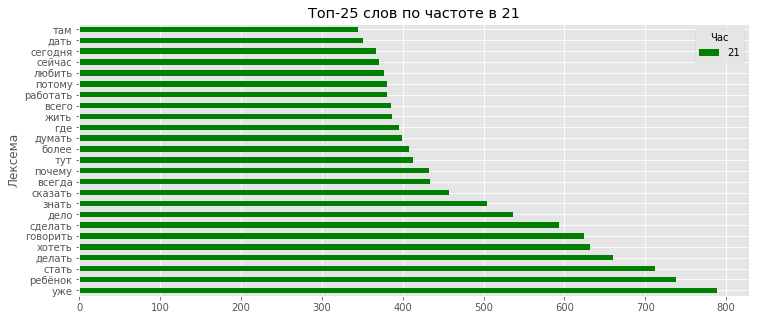

In [102]:
vizualization(res.sort_values(by=res.columns[23], ascending=False)[:25][['Лексема', 21]])
# cloud(res.sort_values(by=res.columns[23], ascending=False)[:25][['Лексема', 21]])

### 22

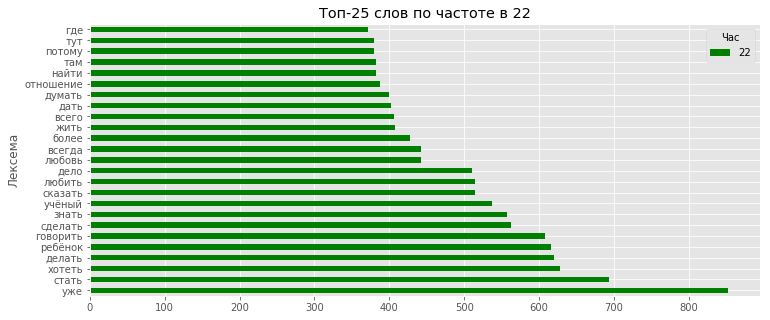

In [103]:
vizualization(res.sort_values(by=res.columns[24], ascending=False)[:25][['Лексема', 22]])
# cloud(res.sort_values(by=res.columns[24], ascending=False)[:25][['Лексема', 22]])

### 23

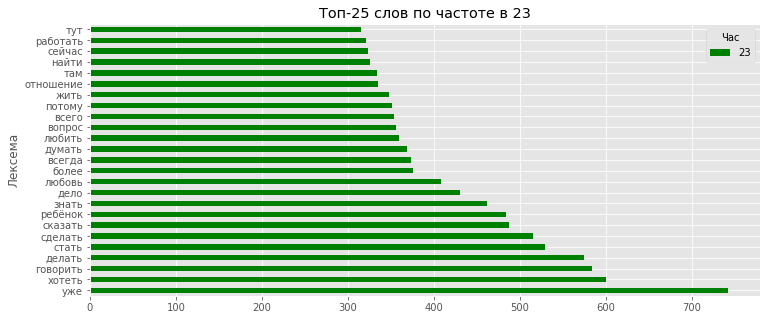

In [104]:
vizualization(res.sort_values(by=res.columns[25], ascending=False)[:25][['Лексема', 23]])
# cloud(res.sort_values(by=res.columns[25], ascending=False)[:25][['Лексема', 23]])

In [105]:
seasons = pd.DataFrame()

In [106]:
for_seasons = df.groupby(['Лексема', 'Часть речи'])['Месяц'].value_counts().unstack().reset_index().fillna(0)

for_seasons = clean(for_seasons)

seasons['Лексема'] = for_seasons['Лексема']
seasons['Зима'] = for_seasons[12] + for_seasons[1] + for_seasons[2]
seasons['Весна'] = for_seasons[3] + for_seasons[4] + for_seasons[5]
seasons['Лето'] = for_seasons[6] + for_seasons[7] + for_seasons[8]
seasons['Осень'] = for_seasons[9] + for_seasons[10] + for_seasons[11]

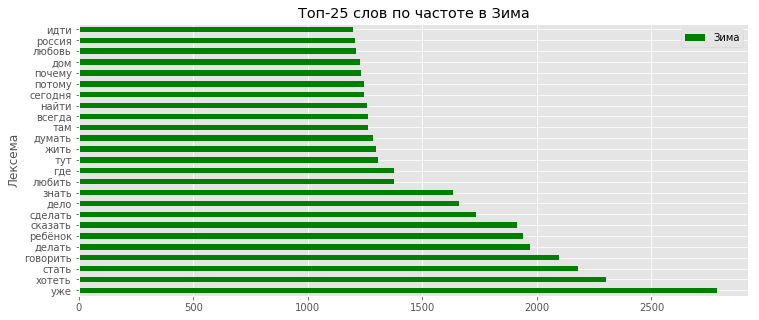

In [107]:
vizualization(seasons.sort_values(by=seasons.columns[1], ascending=False)[:25][['Лексема', 'Зима']])
#cloud(seasons.sort_values(by=seasons.columns[1], ascending=False)[:25][['Лексема', 'Зима']])

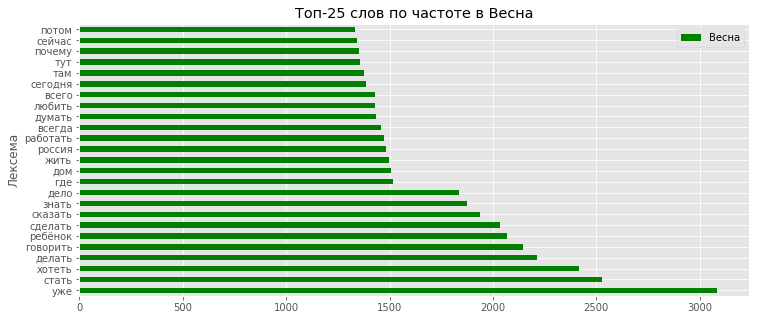

In [108]:
vizualization(seasons.sort_values(by=seasons.columns[2], ascending=False)[:25][['Лексема', 'Весна']])
#cloud(seasons.sort_values(by=seasons.columns[2], ascending=False)[:25][['Лексема', 'Весна']])

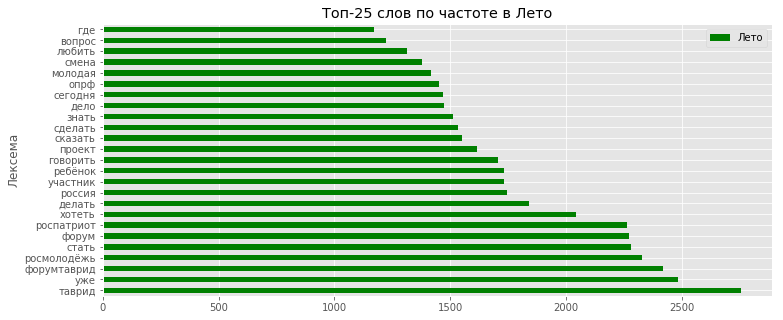

In [109]:
vizualization(seasons.sort_values(by=seasons.columns[3], ascending=False)[:25][['Лексема', 'Лето']])
#cloud(seasons.sort_values(by=seasons.columns[3], ascending=False)[:25][['Лексема', 'Лето']])

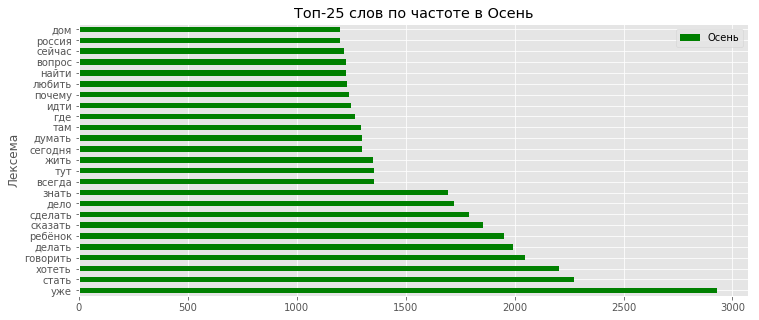

In [110]:
vizualization(seasons.sort_values(by=seasons.columns[4], ascending=False)[:25][['Лексема', 'Осень']])
#cloud(seasons.sort_values(by=seasons.columns[4], ascending=False)[:25][['Лексема', 'Осень']])

In [111]:
for_seasons = df.groupby(['Лексема', 'Часть речи'])['Месяц'].value_counts().unstack().reset_index().fillna(0)
seasons = pd.DataFrame()
for_seasons = clean(for_seasons)
for_seasons = for_seasons[for_seasons['Часть речи'] == "NOUN"]

In [112]:
seasons['Лексема'] = for_seasons['Лексема']
seasons['Зима'] = for_seasons[12] + for_seasons[1] + for_seasons[2]
seasons['Весна'] = for_seasons[3] + for_seasons[4] + for_seasons[5]
seasons['Лето'] = for_seasons[6] + for_seasons[7] + for_seasons[8]
seasons['Осень'] = for_seasons[9] + for_seasons[10] + for_seasons[11]

In [113]:
for_winter = seasons.sort_values(by=seasons.columns[1], ascending=False)[['Лексема', 'Зима']][:25]
for_spring = seasons.sort_values(by=seasons.columns[2], ascending=False)[['Лексема', 'Весна']][:25]
for_summer = seasons.sort_values(by=seasons.columns[3], ascending=False)[['Лексема', 'Лето']][:25]
for_autumn = seasons.sort_values(by=seasons.columns[4], ascending=False)[['Лексема', 'Осень']][:25]

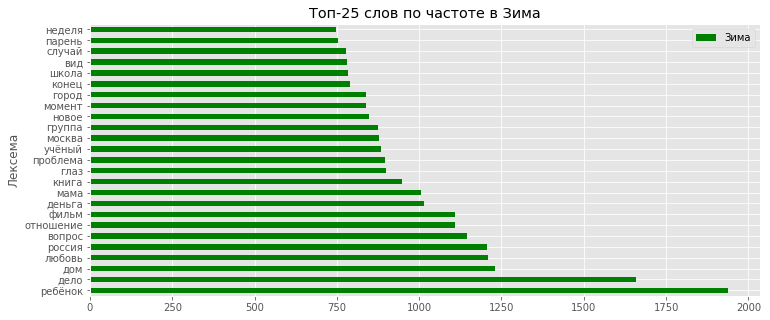

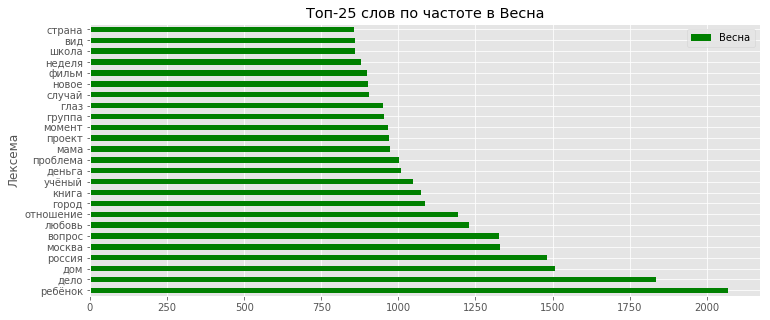

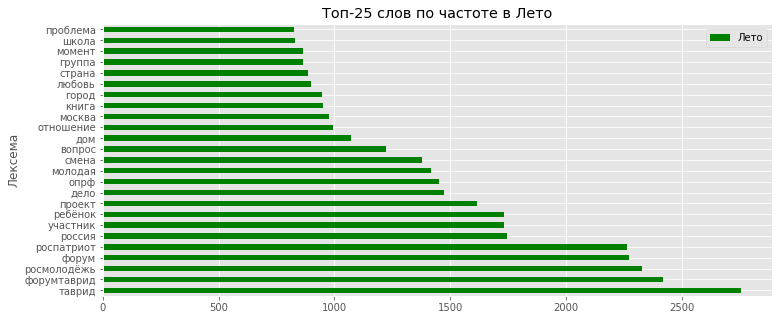

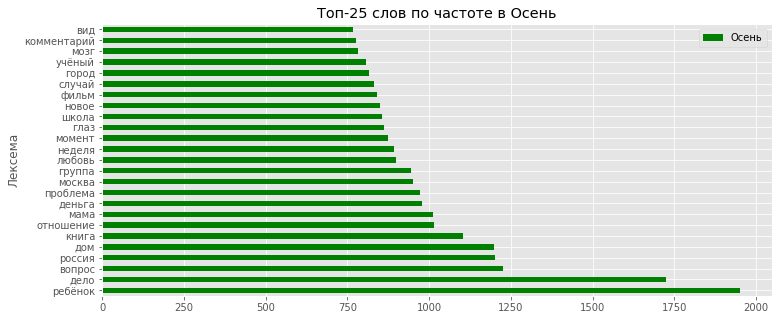

In [114]:
vizualization(for_winter)
vizualization(for_spring)
vizualization(for_summer)
vizualization(for_autumn)